<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Comparing different prompting techniques on different topics</h1>
<h2 style="margin-top: 0.2em; margin-bottom: 0.1em;">The Social Informatics of Large Language Models</h2>


<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Sharon Bures, Claire Jordan, Elena Solar</h3>

</div>
<br>



In [1]:
!pip install -q -U transformers
!pip install -q -U torch

In [4]:
#imports

import openai
openai.api_base="http://91.107.239.71:80" 
openai.api_key=  'o6xHhDpuOlz9pPilFrCZ' # group API key 

import os

# to import API key from separate file
# from dotenv import load_dotenv
# load_dotenv()

# from openai import OpenAI
# client = OpenAI(api_key = os.environ.get("OPENAI_API_KEY"))


from transformers import AutoModelForSeq2SeqLM

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch


import pandas as pd
from itertools import product
import matplotlib.pyplot as plt

import numpy as np
import time
from tqdm import tqdm
import seaborn as sns


In [5]:
tokenizer = AutoTokenizer.from_pretrained('mistralai/Mistral-7B-Instruct-v0.2')
model = AutoModelForCausalLM.from_pretrained('mistralai/Mistral-7B-Instruct-v0.2', torch_dtype=torch.bfloat16)
model.to('cuda:0')

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )
    (norm): MistralRMSNorm(

In [6]:
torch.cuda.empty_cache()

## Testing prompting techniques on coding tasks

### Coding prompts

The first 2 coding problems are inspired by assignments for ICSS. For completeness, both the tasks and the prompt created from those assignments is added in this file.

### Assignment 2 Task 1:
In this task, you are supposed to scrape the results from the Eurovision Song Contest for the following years: [2010](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2010), [2011](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2011), [2012](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2012), [2013](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2013). We selected these years, because for them the html-code is of the same structure. This way, you can reuse your code. 

- We are interested in the assigned points in the final, which can be found in the table named *'Detailed voting results of the final'*.
- Try to write the code for scraping in a *convenient way* (meaning try not to copy and paste stuff for each year...)


***Important***: We want you to scrape the resulting tables by using Beautiful Soup and html-tags and html-attributes. Please **do not use** the `pd.read_html()` function.

***a) Investigate the underlying html structure of the wikipedia pages. Where can you find the table of interest? How could you filter for it?***

Access and request the wikipedia page. Deal with the response in a suitable way and filter for the html-code, reffering to our table of interest.

*Hint:* One way to select the desired table is to use the tables caption and the `.parent` function.

***b) Scrape the content of the table***

Once you restricted the response to the code of the table, start filtering out it's content. 

*Hint:* It might make sense to scrape the table using single lists/vectors for certain information and later recombine these into a data frame of the right format. 

***c) Reuse your code conveniently to scrape not only one year, but the four years (2010 - 2013) into single data frames.***

If you'd like to, you can additionally export the data frames as separate csv-files.

#### rewritten for GPT

Provide python code to solve the following task:

Scrape the results from the Eurovision Song Contest Wikipedia page for the years 2010, 2011 and 2012. The table that should be scraped is named 'Detailed voting results of the final'. 
The code should be written in a convenient way and teh results should be saved for each year in a seperate dataframe. The tables should be scraped using Beautiful Soup and html-tags and html-attributes. Do not use the pd.read_html() function. 



<h4>Task 4 - Vizualize the results in a network graph.</h4>

Choose one of the years you scraped above (i.e. the year, for which you also got the artist-data) and visualize the voting results in a network plot. Play around with different layouts and mappings (for example: how do you indicate contestants vs. only voters, how could you visualize the overall points a country got, how can you display the assigned points?).

*Hint:* It makes sense to restrict your plot on i.e. only the three highest points (8, 10, 12) to prevent it from becoming too cluttered.

#### rewritten for GPT

Provide python code to solve the following task:


Given an existing dataframe called esc_2010 containing the following column structure:

Contestants	Total score	San Marino	Sweden	Albania	Netherlands	Austria	United Kingdom	Israel	Serbia	...	Ireland	Denmark	Montenegro	Slovenia	Georgia	Macedonia	Cyprus	Croatia	Switzerland	Lithuania

In the the contestants column all participating countries are listed. The columns named after countries represent the voters. The content of the columns for each row, represents the points this country assigned to a contestant. 

Given this dataframe, provide code to plot a network of the countries and the points they assign to each other, but only if 8, 10 or 12 points were assigned. 
The plot should have the total points of a contestant written in the node. Countries that only voted and did not participate should be represented in a different color. The edges should represent by color or size, the amount of points a country awarded the other. Add a legend to this graph as well. 


The other coding problems are taken from AtCode. 

- [Jewel Problem](https://atcoder.jp/contests/abc260/tasks/abc260_c)
    - Difficulty: Beginner
    - Date: 17.07.2022

            Problem Statement

            Yoshi has a red jewel of level N. (He has no other jewels). Yoshi can do the following operations any number of times.

            - Convert a red jewel of level n (n is at least 2) into "a red jewel of level (n−1) and X blue jewels of level n".
            - Convert a blue jewel of level n (n is at least 2) into "a red jewel of level (n−1) and Y blue jewels of level (n−1)".

            Yoshi wants as many blue jewels of level 1 as possible. At most, how many blue jewels of level 1 can he obtain by the operations?

            Constraints:

            - 1≤N≤10
            - 1≤X≤5
            - 1≤Y≤5
            - All values in input are integers.

            Input: N X Y

            Output: Print the answer

    

- [Choclate Problem](https://atcoder.jp/contests/arc172/tasks/arc172_a)
    - Difficulty: Regular
    - Date : 18.02.2024

    
            Ms.Candy has decided to distribute chocolates to N friends on Valentine's Day. For the i-th friend (1≤i≤N), she wants to give a square chocolate bar of size 2^A_i​×2^A_i​.
            She has procured a rectangular chocolate bar of size H×W. It is partitioned by lines into a grid of H rows and W columns, each cell being a 1×1 square.
            Determine whether it is possible to divide the chocolate bar along the lines into several pieces to obtain all the chocolate bars for her friends. It is fine to have leftover pieces.

            Constraints:

            - 1≤H≤10^9
            - 1≤W≤10^9
            - 1≤N≤1000
            - 0≤A_i​≤25 (1≤i≤N)
            - All input values are integers.

            Input:

            The input is given from Standard Input in the following format:

            H W N
            A_1​ A_2​ ⋯ A_N​

            Output:

            If the objective is achievable, print Yes; otherwise, print No.


- [Probably English Problem](https://atcoder.jp/contests/abc295/tasks/abc295_a)
    - Difficulty: Beginner
    - Date : 25.03.2023


            Problem Statement

            You are given
            N strings

            W1​,W2​,…,WN​ consisting of lowercase English letters.
            If one or more of these strings equal and, not, that, the, or you, then print Yes; otherwise, print No.
            Constraints

            N is an integer between 1 and
            100, inclusive.
            1≤∣Wi​∣≤50 (∣Wi​∣ is the length of
            Wi​.)
            Wi​ consists of lowercase English letters.

- [326-like Numbers](https://atcoder.jp/contests/abc326/tasks/abc326_b)
    - Difficulty: Beginner
    - Date: 28.10.2023
            Problem Statement

            A 326-like number is a three-digit positive integer where the product of the hundreds and tens digits equals the ones digit.

            For example,
            326,400,144 are 326-like numbers, while

            623,777,429 are not.

            Given an integer
            N, find the smallest 326-like number greater than or equal to

            N. It always exists under the constraints.
            Constraints

            100≤N≤919
            N is an integer.


- [The Middle Day](https://atcoder.jp/contests/abc315/tasks/abc315_b)
    - Difficulty: Beginner 
    - Date: 29.08.2023

            Problem Statement

            In the calendar of AtCoderLand, a year consists of
            M months: month 1, month 2, …, month M. The i-th month consists of Di​ days: day 1, day 2, …, day Di​.
            Furthermore, the number of days in a year is odd, that is, D1​+D2​+⋯+DM​ is odd.
            Find what day of what month is the middle day of the year.
            In other words, let day 1 of month 1 be the first day, and find a and b such that the ((D1​+D2​+⋯+DM​+1)/2)-th day is day b of month

            a.
            Constraints

                All input values are integers.

            1≤M≤100
            1≤Di​≤100
            D1​+D2​+⋯+DM​ is odd.



In [3]:
# calculation of total results
12*3*3 + 12*5*3*2

468

In [5]:
# Default Prompt Webscraping --------------------------------------------------------------------------------------------------
base_prompt_p1 = """ 
Provide python code to solve the following task:
Scrape the results from the Eurovision Song Contest Wikipedia (https://en.wikipedia.org/wiki/Eurovision_Song_Contest_year) page for the years 2010, 2011 and 2012. 
The table that should be scraped is named 'Detailed voting results of the final'. 
The code should be written in a convenient way, and the results should be saved for each year in a separate dataframe. 
The tables should be scraped using Beautiful Soup and html-tags and html-attributes. Do not use the pd.read_html() function. 
"""
## estimated token count : 140


# Default Prompt Network Graph --------------------------------------------------------------------------------------------------

base_prompt_p2 = """ 
Provide python code to solve the following task:
Given an existing dataframe called esc_2010 containing the following column structure:
Contestants	Total score	San Marino	Sweden	Albania	Netherlands	Austria	United Kingdom	Israel	Serbia	...	Ireland	Denmark	Montenegro	Slovenia	Georgia	Macedonia	Cyprus	Croatia	Switzerland	Lithuania
In the the contestants column all participating countries are listed. The columns named after countries represent the voters. 
The content of the columns for each row, represents the points this country assigned to a contestant. 
Given this dataframe, provide code to plot a network of the countries and the points they assign to each other, but only if 8, 10 or 12 points were assigned. 
The plot should have the total points of a contestant written in the node. Countries that only voted and did not participate should be represented in a different color. 
The edges should represent by color or size, the amount of points a country awarded the other. Add a legend to this graph as well. 
"""

# Default Prompt Jewel Problem --------------------------------------------------------------------------------------------------


base_prompt_p3 = """
Provide python code to solve the following task:
I have a red jewel of level N. (He has no other jewels). I can do either of the following operations any number of times.
- Convert a red jewel of level n (n is at least 2) into "a red jewel of level (n-1) and X blue jewels of level n".
- Or Convert a blue jewel of level n (n is at least 2) into "a red jewel of level (n-1) and Y blue jewels of level (n-1)".
I want as many blue jewels of level 1 as possible. At most, how many blue jewels of level 1 can he obtain by the operations?
Constraints:
- 1≤N≤10
- 1≤X≤5
- 1≤Y≤5
- All values in input are integers.
Input: N, X, Y
Output: Print the answer
"""
# Default Prompt Choclate Problem --------------------------------------------------------------------------------------------------

base_prompt_p4 = """ 
Provide python code to solve the following task:
I have decided to distribute chocolates to N friends on Valentine's Day. For the i-th friend (1≤i≤N), I want to give a square chocolate bar of size 2^A_i×2^A_i.
I have procured a rectangular chocolate bar of size H×W. It is partitioned by lines into a grid of H rows and W columns, each cell being a 1×1 square.
Determine whether it is possible to divide the chocolate bar along the lines into several pieces to obtain all the chocolate bars for my friends. It is fine to have leftover pieces.
Constraints:
- 1≤H≤10^9
- 1≤W≤10^9
- 1≤N≤1000
- 0≤A_i≤25 (1≤i≤N)
- All input values are integers.
Input: H, W, N, A_1, A_2, ... ,  A_N
Output: If the objective is achievable, print Yes; otherwise, print No.
"""


# Default Prompt Probably English --------------------------------------------------------------------------------------------------

base_prompt_p5 = """
Provide python code to solve the following task:
You are given N strings W_1,W_2,…,W_N consisting of lowercase English letters.
If one or more of these strings equal and, not, that, the, or you, then print Yes; otherwise, print No.
Constraints:
- N is an integer between 1 and 100, inclusive.
- 1≤|W_i|≤50 (|W_i| is the length of W_i.)
- W_i consists of lowercase English letters.
Input: N, W_1, W_2, ..., W_N
Output: Print the answer
"""

# Default Prompt 326 like number --------------------------------------------------------------------------------------------------

base_prompt_p6 = """
Provide python code to solve the following task:
A 326-like number is a three-digit positive integer where the product of the hundreds and tens digits equals the ones digit.
For example, 326,400,144 are 326-like numbers, while 623,777,429 are not.
Given an integer N, find the smallest 326-like number greater than or equal to N. It always exists under the constraints.
Constraints:
- 100≤N≤919
- N is an integer.
Input: N
Output: print the answer
"""

# Default Prompt The Middle Day --------------------------------------------------------------------------------------------------

base_prompt_p7 = """
Provide python code to solve the following task:
In the calendar of MyteryLand, a year consists of M months: month 1, month 2, …, month M. The i-th month consists of D_i days: day 1, day 2, …, day D_i.
Furthermore, the number of days in a year is odd, that is, D_1+D_2+⋯+D_M is odd.
Find what day of what month is the middle day of the year.
In other words, let day 1 of month 1 be the first day, and find a and b such that the ((D_1+D_2+⋯+D_M+1)/2)-th day is day b of month a.
Constraints:
- All input values are integers.
- 1≤M≤100
- 1≤D_1≤100
- D_1 + D_2 + ... + D_M is odd
Input: M, D_1, D_2, ..., D_M
Output: a, b (de day b of month a)
"""

In [6]:
# Blurry Prompts to check effectiveness of Position --------------------------------------------------------------------------------------------------


blurry_base_a = """
I am a student living on my own. I have 5 cats I need to take care of. I like flowers and rainbows. I listen to metal music and country songs. I think today I will eat pizza for dinner.
"""
blurry_base_b = """
Cooking is a lot of fun, I like to take basic recipes and make them special by preparing the food on my own. I also like to play the guitar and I am learning songs that I can play for my friends and family.
"""
blurry_p1_start = base_prompt_p1 + blurry_base_a + blurry_base_b
blurry_p2_start = base_prompt_p2 + blurry_base_a + blurry_base_b
blurry_p3_start = base_prompt_p3 + blurry_base_a + blurry_base_b
blurry_p4_start = base_prompt_p4 + blurry_base_a + blurry_base_b
blurry_p5_start = base_prompt_p5 + blurry_base_a + blurry_base_b
blurry_p6_start = base_prompt_p6 + blurry_base_a + blurry_base_b
blurry_p7_start = base_prompt_p7 + blurry_base_a + blurry_base_b

blurry_p1_mid = blurry_base_a + base_prompt_p1 + blurry_base_b
blurry_p2_mid = blurry_base_a + base_prompt_p2 + blurry_base_b
blurry_p3_mid = blurry_base_a + base_prompt_p3 + blurry_base_b
blurry_p4_mid = blurry_base_a + base_prompt_p4 + blurry_base_b
blurry_p5_mid = blurry_base_a + base_prompt_p5 + blurry_base_b
blurry_p6_mid = blurry_base_a + base_prompt_p6 + blurry_base_b
blurry_p7_mid = blurry_base_a + base_prompt_p7 + blurry_base_b


blurry_p1_end = blurry_base_a + blurry_base_b + base_prompt_p1
blurry_p2_end = blurry_base_a + blurry_base_b + base_prompt_p2
blurry_p3_end = blurry_base_a + blurry_base_b + base_prompt_p3
blurry_p4_end = blurry_base_a + blurry_base_b + base_prompt_p4
blurry_p5_end = blurry_base_a + blurry_base_b + base_prompt_p5
blurry_p6_end = blurry_base_a + blurry_base_b + base_prompt_p6
blurry_p7_end = blurry_base_a + blurry_base_b + base_prompt_p7

In [7]:
# Emotional Prompts to check effectiveness of Position --------------------------------------------------------------------------------------------------

emotional_base = """ 
I have to work on this problem for my job. I have to hand in the coding solution by the end of the day. I have nothing so far. 
My boss hinted heavily, that I would loose my job, if I don't hand in these results. I can't loose my job, I have to provide for my family, 
money is already tight and I don't want to end up on the street with my 1 year old little boy, my precious little kid.
"""

emotional_p1_start = base_prompt_p1 + emotional_base
emotional_p2_start = base_prompt_p2 + emotional_base
emotional_p3_start = base_prompt_p3 + emotional_base
emotional_p4_start = base_prompt_p4 + emotional_base
emotional_p5_start = base_prompt_p5 + emotional_base
emotional_p6_start = base_prompt_p6 + emotional_base
emotional_p7_start = base_prompt_p7 + emotional_base

emotional_p1_end = emotional_base + base_prompt_p1
emotional_p2_end = emotional_base + base_prompt_p2
emotional_p3_end = emotional_base + base_prompt_p3
emotional_p4_end = emotional_base + base_prompt_p4
emotional_p5_end = emotional_base + base_prompt_p5
emotional_p6_end = emotional_base + base_prompt_p6
emotional_p7_end = emotional_base + base_prompt_p7

In [8]:
# Chain of Thought Prompts to check effectiveness of Position, problem 1 --------------------------------------------------------------------------------------------------

cot_p1_base = """ 
To achieve this task, you can access and request the wikipedia page, deal with the response in a suitable way
and filter for the html-code, refering to our table of interest.
On way would be to select the desired table is to use the tables caption and the .parent function
It might make sense to scrape the table using single lists/vectors for certain information and later recombine these into a dataframe.
"""
cot_p1_start = base_prompt_p1 + cot_p1_base
cot_p1_end = cot_p1_base + base_prompt_p1

# Chain of Thought Prompts to check effectiveness of Position, problem 2 --------------------------------------------------------------------------------------------------

cot_p2_base = """ 
To achieve this task, follow the given steps:
- find a suitable way to create nodes for both contestants and only voters
- filter for the countries that have given each other more than 8 points. 
- create edges between the countries and save the points awarded from a country to another
- use the total points to add the value to the contestants nodes
- plot the graph by taken into account all given factors
- add legend, that explains the edge colors, the different colors of nodes and any other variable. 
"""
cot_p2_start = base_prompt_p2 + cot_p2_base
cot_p2_end = cot_p2_base + base_prompt_p2

# Chain of Thought Prompts to check effectiveness of Position, problem 3 --------------------------------------------------------------------------------------------------

cot_p3_base = """
To achieve this task, follow the given steps:
- create a function that receives the mentioned input, being the number of jewels, the number of blue jewels that can be exchanged in the first transaction option
and the number of blue jewels that can be exchanged in the secon transaction option. 
- check for the given constraints
- provide code to check the resulting jewels given a certain transaction
- return the output
Example: Input of 2, 3 and 4: I can obtain 12 blue jewels of level 1 by the following conversions.
First, he converts a red jewel of level 2 into a red jewel of level 1 and 3 blue jewels of level 2. After this operation, I have 1 red jewel of level 1 and 3 blue jewels of level 2.
Next, I repeat the following conversion 3 times: converting a blue jewel of level 2 into a red jewel of level 1 and 4 blue jewels of level 1.
After these operations, I have 4 red jewels of level 1 and 12 blue jewels of level 1. I cannot perform a conversion anymore. I cannot obtain more than 12 blue jewels of level 1, so the answer is 12.
"""
cot_p3_start = base_prompt_p3 + cot_p3_base
cot_p3_end = cot_p3_base + base_prompt_p3


# Chain of Thought Prompts to check effectiveness of Position, problem 4 --------------------------------------------------------------------------------------------------

cot_p4_base = """
To achieve this task, follow the given steps:
- create a function that receives the mentioned input: height and width of the chocolate bar, number of friends, and exponential number for each friend in order. 
- check if the values given as input fulfill the constraints
- check if the choclate bar can be divide so that each friend is able to optain a piece of the asked for size.
- return the answer
Example input: 4,4,4,1,0,0,1
By dividing a 4×4 chocolate bar as shown in the figure below, you can obtain pieces of size 2×2,1×1,1×1,2×2. So the answer is yes.
"""

cot_p4_start = base_prompt_p4 + cot_p4_base
cot_p4_end = cot_p4_base + base_prompt_p4

# Chain of Thought Prompts to check effectiveness of Position, problem 5 --------------------------------------------------------------------------------------------------

cot_p5_base = """ 
To achieve this task, follow the given steps:
- create a funtion that receives a string as an input
- split the words into a list of strings
- check if the constraints are met: no more than 100 words, words are not longer than 50 letters, and there are only lowercase letters. 
- check if any of the following words is in the list: and, not, that, the, you
- return the output "yes, this is porbably english, otherwise return no
"""
cot_p5_start = base_prompt_p5 + cot_p5_base
cot_p5_end = cot_p5_base + base_prompt_p5

# Chain of Thought Prompts to check effectiveness of Position, problem 6 --------------------------------------------------------------------------------------------------

cot_p6_base = """ 
To achieve this task, follow the given steps:
- create a function that takes an integer as input
- check if the input respects the constraints
- check if the multiplication of the first and second digit equals to the 3 digit. 
- if not, search for the smallest next integer where this is the case. 
- return that integer value
"""
cot_p6_start = base_prompt_p6 + cot_p6_base
cot_p6_end = cot_p6_base + base_prompt_p6

# Chain of Thought Prompts to check effectiveness of Position, problem 7 --------------------------------------------------------------------------------------------------

cot_p7_base = """ 
To achieve this task, follow the given steps:
sample input: 12
31 28 31 30 31 30 31 31 30 31 30 31
In this input, a year consists of 31+28+31+30+31+30+31+31+30+31+30+31=365 days.
Let us find the middle day, which is the((365+1)/2=183)-th day.
- Months 1,2,3,4,5,6 contain a total of181 days.
- Day 1 of month 7 is the 182-th day.
- Day 2 of month 7 is the 183-th day.
Thus, the answer is day
2 of month 7.
"""
cot_p7_start = base_prompt_p7 + cot_p7_base
cot_p7_end = cot_p7_base + base_prompt_p7

In [9]:
# Expert Persona Prompts to check effectiveness of Position --------------------------------------------------------------------------------------------------

expert_persona = """ 
You are an expert in solving problems by using code. You have had years of experience working with webscraping, graphs and solving tricky problems using code. 
""" 

expert_p1_start = base_prompt_p1 + expert_persona
expert_p2_start = base_prompt_p2 + expert_persona
expert_p3_start = base_prompt_p3 + expert_persona
expert_p4_start = base_prompt_p4 + expert_persona
expert_p5_start = base_prompt_p5 + expert_persona
expert_p6_start = base_prompt_p6 + expert_persona
expert_p7_start = base_prompt_p7 + expert_persona

expert_p1_end = expert_persona + base_prompt_p1
expert_p2_end = expert_persona + base_prompt_p2
expert_p3_end = expert_persona + base_prompt_p3
expert_p4_end = expert_persona + base_prompt_p4
expert_p5_end = expert_persona + base_prompt_p5
expert_p6_end = expert_persona + base_prompt_p6
expert_p7_end = expert_persona + base_prompt_p7

# Non-Expert Persona Prompts to check effectiveness of Position --------------------------------------------------------------------------------------------------

non_expert_persona = """ 
You are a physics student, that has not coded before, but you are currently taking a coding class and were given this problem, for which you are supposed to provide an answer code for the final project. 
"""

non_expert_p1_start = base_prompt_p1 + non_expert_persona
non_expert_p2_start = base_prompt_p2 + non_expert_persona
non_expert_p3_start = base_prompt_p3 + non_expert_persona
non_expert_p4_start = base_prompt_p4 + non_expert_persona
non_expert_p5_start = base_prompt_p5 + non_expert_persona
non_expert_p6_start = base_prompt_p6 + non_expert_persona
non_expert_p7_start = base_prompt_p7 + non_expert_persona

non_expert_p1_end = non_expert_persona + base_prompt_p1
non_expert_p2_end = non_expert_persona + base_prompt_p2
non_expert_p3_end = non_expert_persona + base_prompt_p3
non_expert_p4_end = non_expert_persona + base_prompt_p4
non_expert_p5_end = non_expert_persona + base_prompt_p5
non_expert_p6_end = non_expert_persona + base_prompt_p6
non_expert_p7_end = non_expert_persona + base_prompt_p7

In [10]:
# creating dictionaries and dataframes using the previously defined prompts

# Problem 1 dictionary --------------------------------------------------------------------------------------------------

p1_dict = {'default' : [base_prompt_p1,'none', 'none'],
             'blurry' : [blurry_p1_start, blurry_p1_mid, blurry_p1_end],
             'emotional' : [emotional_p1_start,'none', emotional_p1_end],
             'chain_of_thought' : [cot_p1_start,'none', cot_p1_end],
             'exp_persona' : [expert_p1_start,'none', expert_p1_end],
             'non_exp_persona': [non_expert_p1_start,'none', non_expert_p1_end],
}

# Problem 2 dictionary --------------------------------------------------------------------------------------------------

p2_dict = {'default' : [base_prompt_p2,'none','none'],
             'blurry' : [blurry_p2_start, blurry_p2_mid, blurry_p2_end],
             'emotional' : [emotional_p2_start,'none', emotional_p2_end],
             'chain_of_thought' : [cot_p2_start,'none', cot_p2_end],
             'exp_persona' : [expert_p2_start,'none', expert_p2_end],
             'non_exp_persona': [non_expert_p2_start,'none', non_expert_p2_end],
}

# Problem 3 dictionary --------------------------------------------------------------------------------------------------

p3_dict = {'default' : [base_prompt_p3, 'none','none'],
             'blurry' : [blurry_p3_start, blurry_p3_mid, blurry_p3_end],
             'emotional' : [emotional_p3_start,'none', emotional_p3_end],
             'chain_of_thought' : [cot_p3_start,'none', cot_p3_end],
             'exp_persona' : [expert_p3_start,'none', expert_p3_end],
             'non_exp_persona': [non_expert_p3_start,'none', non_expert_p3_end],
}

# Problem 4 dictionary --------------------------------------------------------------------------------------------------

p4_dict = {'default' : [base_prompt_p4, 'none','none'],
             'blurry' : [blurry_p4_start, blurry_p4_mid, blurry_p4_end],
             'emotional' : [emotional_p4_start,'none', emotional_p4_end],
             'chain_of_thought' : [cot_p4_start,'none', cot_p4_end],
             'exp_persona' : [expert_p4_start,'none', expert_p4_end],
             'non_exp_persona': [non_expert_p4_start, 'none', non_expert_p4_end],
}

# Problem 5 dictionary --------------------------------------------------------------------------------------------------

p5_dict = {'default' : [base_prompt_p5, 'none','none'],
             'blurry' : [blurry_p5_start, blurry_p5_mid, blurry_p5_end],
             'emotional' : [emotional_p5_start,'none', emotional_p5_end],
             'chain_of_thought' : [cot_p5_start,'none', cot_p5_end],
             'exp_persona' : [expert_p5_start,'none', expert_p5_end],
             'non_exp_persona': [non_expert_p5_start,'none', non_expert_p5_end],
}

# Problem 6 dictionary --------------------------------------------------------------------------------------------------

p6_dict = {'default' : [base_prompt_p6, 'none','none'],
             'blurry' : [blurry_p6_start, blurry_p6_mid, blurry_p6_end],
             'emotional' : [emotional_p6_start,'none', emotional_p6_end],
             'chain_of_thought' : [cot_p6_start,'none', cot_p6_end],
             'exp_persona' : [expert_p6_start,'none', expert_p6_end],
             'non_exp_persona': [non_expert_p6_start,'none', non_expert_p6_end],
}

# Problem 7 dictionary --------------------------------------------------------------------------------------------------


p7_dict = {'default' : [base_prompt_p7, 'none','none'],
             'blurry' : [blurry_p7_start, blurry_p7_mid, blurry_p7_end],
             'emotional' : [emotional_p7_start,'none', emotional_p7_end],
             'chain_of_thought' : [cot_p7_start,'none', cot_p7_end],
             'exp_persona' : [expert_p7_start,'none', expert_p7_end],
             'non_exp_persona': [non_expert_p7_start,'none', non_expert_p7_end],
}


# Resulting dataframes --------------------------------------------------------------------------------------------------

positioning = ['Beginning', 'middle', 'end']
p1 = pd.DataFrame.from_dict(p1_dict, orient = 'index', columns = positioning)
p2 = pd.DataFrame.from_dict(p2_dict, orient = 'index', columns = positioning)
p3 = pd.DataFrame.from_dict(p3_dict, orient = 'index', columns = positioning)
p4 = pd.DataFrame.from_dict(p4_dict, orient = 'index', columns = positioning)
p5 = pd.DataFrame.from_dict(p5_dict, orient = 'index', columns = positioning)
p6 = pd.DataFrame.from_dict(p6_dict, orient = 'index', columns = positioning)
p7 = pd.DataFrame.from_dict(p7_dict, orient = 'index', columns = positioning)


In [239]:
def running_gpt(prompt, runs):
    """ 
    This function is used to call gpt for a given prompt


    Parameters: 
    -----------

        prompt: prompt that should be used in gpt
        runs: number of runs the prompt should be used

    Return : 
    ----------
        returns: a list containing the result of each run
    """
    global tokens  # Declare tokens as a global variable
    attempts = 3
    response_list = []

    for _ in range(attempts):
        try:
            time.sleep(2)  
            responses = openai.ChatCompletion.create(
                #model="gpt-4-1106-preview",
                model = "gpt-3.5-turbo-0125",
                messages=[{"role": "user", "content": prompt}],
                n=runs,
               
            )         
            
            total_tokens = responses['usage']['prompt_tokens'] + responses['usage']['completion_tokens']
            #tokens += total_tokens *20
            tokens += total_tokens
            response_list.append([i['message']['content'] for i in responses['choices']])
            break  
        except Exception as e:
            print(f"An error occurred: {e}. Retrying...")

    return response_list

In [137]:
p3_dict

{'default': ['\nProvide python code to solve the following task:\nI have a red jewel of level N. (He has no other jewels). I can do either of the following operations any number of times.\n- Convert a red jewel of level n (n is at least 2) into "a red jewel of level (n-1) and X blue jewels of level n".\n- Or Convert a blue jewel of level n (n is at least 2) into "a red jewel of level (n-1) and Y blue jewels of level (n-1)".\nI want as many blue jewels of level 1 as possible. At most, how many blue jewels of level 1 can he obtain by the operations?\nConstraints:\n- 1≤N≤10\n- 1≤X≤5\n- 1≤Y≤5\n- All values in input are integers.\nInput: N, X, Y\nOutput: Print the answer\n',
  'none',
  'none'],
 'blurry': ['\nProvide python code to solve the following task:\nI have a red jewel of level N. (He has no other jewels). I can do either of the following operations any number of times.\n- Convert a red jewel of level n (n is at least 2) into "a red jewel of level (n-1) and X blue jewels of level n

In [150]:
# code to run gpt for all problems


dict_list = [p3_dict, p4_dict, p5_dict, p6_dict, p7_dict]

for idx, p_dict in enumerate(dict_list, start=3):  # Start index from 3
    results_data = []

    total_iterations = sum(len(prompts) for prompts in p_dict.values())

    with tqdm(total=total_iterations, desc=f'Processing prompts for p{idx}') as pbar:
        for prompt_type, prompts in p_dict.items():
            for i, prompt in enumerate(prompts):
                if prompt != "none":
                    response_list = running_gpt(prompt, 3)
                    prompt_data = {
                        'prompt_type': prompt_type,
                        'prompt': prompt,
                        'positioning': i + 1,
                    }
                    for j, response in enumerate(response_list[0]):
                        prompt_data[f'run_{j+1}'] = response
                else:
                    prompt_data = {
                        'prompt_type': prompt_type,
                        'prompt': prompt,
                        'positioning': i + 1,
                    }
                    for j in range(3):
                        prompt_data[f'run_{j+1}'] = 'none'

                results_data.append(prompt_data)
                pbar.update(1)  # Update progress bar

    df = pd.DataFrame(results_data)

    df.to_csv(f"code_data/gpt4_p{idx}_df.csv")




Processing prompts for p7: 100%|██████████| 18/18 [04:39<00:00, 15.51s/it]


In [240]:
# code, if one set needs to be run individually 

results_data = []

total_iterations = sum(len(prompts) for prompts in p7_dict.values())

with tqdm(total=total_iterations, desc='Processing prompts') as pbar:
    for prompt_type, prompts in p7_dict.items():
        for i, prompt in enumerate(prompts):
            if prompt != "none":
                response_list = running_gpt(prompt, 3)
                prompt_data = {
                    'prompt_type': prompt_type,
                    'prompt': prompt,
                    'positioning': i + 1,
                }
                for j, response in enumerate(response_list[0]):
                    prompt_data[f'run_{j+1}'] = response
            else:
                prompt_data = {
                    'prompt_type': prompt_type,
                    'prompt': prompt,
                    'positioning': i + 1,
                }
                for j in range(3):
                    prompt_data[f'run_{j+1}'] = 'none'
            
            results_data.append(prompt_data)
            pbar.update(1)  # Update progress bar




Processing prompts: 100%|██████████| 18/18 [01:25<00:00,  4.77s/it]


In [10]:
tokens

3632125

In [241]:
# saving the results of each run individually 

df = pd.DataFrame(results_data)

df.to_csv("code_data/gpt_p7_df.csv")
results_data

[{'prompt_type': 'default',
  'prompt': '\nProvide python code to solve the following task:\nIn the calendar of MyteryLand, a year consists of M months: month 1, month 2, …, month M. The i-th month consists of D_i days: day 1, day 2, …, day D_i.\nFurthermore, the number of days in a year is odd, that is, D_1+D_2+⋯+D_M is odd.\nFind what day of what month is the middle day of the year.\nIn other words, let day 1 of month 1 be the first day, and find a and b such that the ((D_1+D_2+⋯+D_M+1)/2)-th day is day b of month a.\nConstraints:\n- All input values are integers.\n- 1≤M≤100\n- 1≤D_1≤100\n- D_1 + D_2 + ... + D_M is odd\nInput: M, D_1, D_2, ..., D_M\nOutput: a, b (de day b of month a)\n',
  'positioning': 1,
  'run_1': "Here is the Python code to solve the given task:\n\n```python\ndef find_middle_day(M, days):\n    total_days = sum(days)\n    middle_day = (total_days + 1) // 2\n    current_day = 1\n    current_month = 1\n    \n    while middle_day > days[current_month - 1]:\n        

In [32]:



def running_mistral(prompt, runs, tokenizer, model):

    """ 
    This function is used to call mistral for a given prompt


    Parameters: 
    -----------

        prompt: prompt that should be used in gpt
        runs: number of runs the prompt should be used
        tokenizer: input the tokenizer instead of predefining it
        model : input model instead of predefining it
        temeperature: temperature that should be set for gpt

    Return : 
    ----------
        returns: a list containing the result of each run
    """
    
    
    responses = []
    for n in range(0, runs):
        
        model_inputs = tokenizer([prompt], return_tensors="pt")
        model_inputs.to('cuda')
        generated_ids = model.generate(**model_inputs, max_new_tokens=500, do_sample=True, top_k=10, num_return_sequences=1)
        answer = tokenizer.batch_decode(generated_ids)[0].replace(prompt, "")
        # Remove inputs from GPU
        del model_inputs
        torch.cuda.empty_cache()

        responses.append(answer)
        #print(responses)


    return responses

In [33]:
# same code as for gpt, but for mistral
results_data =[]
for prompt_type, prompts in p7_dict.items():
    for i, prompt in enumerate(prompts):
        if prompt != "none":
            
            response_list = running_mistral(prompt,3, tokenizer, model )
            
            prompt_data = {
                'prompt_type' : prompt_type,
                'prompt' : prompt,
                'positioning': i+1,                 
            }
            
            for i, response in enumerate(response_list):
                prompt_data[f'run_{i+1}'] = response
                
        else:
            prompt_data = {
                'prompt_type' : prompt_type,
                'prompt' : prompt,
                'positioning': i+1,  

            }
            
            for i in range(3):
                prompt_data[f'run_{i+1}'] = 'none'
            
        results_data.append(prompt_data)  
            
            

NameError: name 'tokenizer' is not defined

In [18]:

# # Convert the list of dictionaries into a DataFrame
# df = pd.DataFrame(results_data)
# df
# df.to_csv("mistral_p7_df.csv")

In [11]:
# creating a list of dictionaries for all GPT4 results

p_dataframes_gpt4 = []

for i in range(3, 8):
    file_path = f"code_data/gpt4_p{i}_df.csv"
    
    p_mistral = pd.read_csv(file_path).drop("Unnamed: 0", axis=1)
    
    rows_to_drop = p_mistral[p_mistral['prompt'] == "none"].index
    p_mistral.drop(rows_to_drop, inplace=True)
    
    p_mistral.reset_index(drop=True, inplace=True)
    
    p_dataframes_gpt4.append(p_mistral)

p_dataframes_gpt4[2]


,prompt_type,prompt,positioning,run_1,run_2,run_3
0,default,\nProvide python code to solve the following t...,1,Here is a simple Python script to solve the ta...,Certainly! Below is a Python code snippet that...,Here's a Python script that solves the task yo...
1,blurry,\nProvide python code to solve the following t...,1,"To solve the given task, we can iterate throug...","To solve the described task, we can write a si...",The task you've described suggests that you wa...
2,blurry,\nI am a student living on my own. I have 5 ca...,2,Here's a Python code snippet that can solve th...,"Sure, below you will find a Python code snippe...",Here is the Python code to solve the described...
3,blurry,\nI am a student living on my own. I have 5 ca...,3,You can solve this task by iterating through t...,You can solve this task by iterating through t...,Here's a simple Python program that accomplish...
4,emotional,\nProvide python code to solve the following t...,1,I understand that this is an urgent task for y...,"I'm sorry to hear about your situation, and I'...","I understand the urgency of the situation, and..."
5,emotional,\nI have to work on this problem for my job. ...,3,"Sure, here is a simple Python code that solves...",Here's a Python code snippet that takes N foll...,"Understood, here's a Python code that should s..."
6,chain_of_thought,\nProvide python code to solve the following t...,1,Here is the Python code to solve the task:\n\n...,You can use the following Python code to solve...,Here is a Python function that performs the ta...
7,chain_of_thought,"\nTo achieve this task, follow the given step...",3,Here's the Python code that accomplishes the g...,Below is the Python function to perform the gi...,The task can be achieved by implementing a Pyt...
8,exp_persona,\nProvide python code to solve the following t...,1,"Below is a Python function, `check_words`, tha...",Here is a Python code snippet that can solve t...,Here is a python code that solves the given ta...
9,exp_persona,\nYou are an expert in solving problems by us...,3,You can solve this task by creating a Python p...,Below is the Python code that checks if any of...,Certainly! Below is a Python code snippet that...


In [12]:
# creating a list of dictionaries for all GPT3.5 results

p_dataframes_gpt3 = []

for i in range(3, 8):
    file_path = f"code_data/gpt_p{i}_df.csv"
    
    p_mistral = pd.read_csv(file_path).drop("Unnamed: 0", axis=1)
    
    rows_to_drop = p_mistral[p_mistral['prompt'] == "none"].index
    p_mistral.drop(rows_to_drop, inplace=True)
    
    p_mistral.reset_index(drop=True, inplace=True)
    
    p_dataframes_gpt3.append(p_mistral)

p_dataframes_gpt3[2]


,prompt_type,prompt,positioning,run_1,run_2,run_3
0,default,\nProvide python code to solve the following t...,1,"```python\nN = int(input())\nwords = set([""and...",Here is the Python code to solve the given tas...,```python\nN = int(input())\nwords = [input() ...
1,blurry,\nProvide python code to solve the following t...,1,```python\nN = int(input())\nwords = [input() ...,Here is the Python code to solve the given tas...,Here is the Python code to solve the task:\n\n...
2,blurry,\nI am a student living on my own. I have 5 ca...,2,Here is a Python code to solve the task:\n\n``...,Here is the Python code to solve the given tas...,```python\nN = int(input())\nwords = []\nspeci...
3,blurry,\nI am a student living on my own. I have 5 ca...,3,Here is the Python code to solve the given tas...,Here is the python code to solve the task:\n\n...,```python\nN = int(input())\nwords = [input() ...
4,emotional,\nProvide python code to solve the following t...,1,Here is the Python code to solve the problem:\...,Here is a Python code that solves the problem:...,Here is a Python code to solve the given task:...
5,emotional,\nI have to work on this problem for my job. ...,3,# Function to check if any of the given string...,# Get the number of strings\nN = int(input())\...,```python\nN = int(input())\nwords = [input() ...
6,chain_of_thought,\nProvide python code to solve the following t...,1,Here is the Python code to solve the task:\n\n...,Here is the Python code to solve the task:\n\n...,Here is the Python code to achieve the task:\n...
7,chain_of_thought,"\nTo achieve this task, follow the given step...",3,Here is a Python code to solve the given task:...,Here is a Python code that solves the above ta...,Here is a Python code to solve the given task:...
8,exp_persona,\nProvide python code to solve the following t...,1,# Read input\nN = int(input())\nwords = []\nfo...,"```python\nN = int(input())\nwords = set([""and...",```python\nN = int(input())\nwords = []\nfor _...
9,exp_persona,\nYou are an expert in solving problems by us...,3,Here is the Python code to solve the given tas...,Here is the python code to solve the given tas...,Here is the python code to solve the given tas...


In [13]:
# creating a list of dictionaries for all Mistral results


p_dataframes = []

for i in range(1, 8):
    file_path = f"code_data/mistral_p{i}_df.csv"
    
    p_mistral = pd.read_csv(file_path).drop("Unnamed: 0", axis=1)
    
    rows_to_drop = p_mistral[p_mistral['prompt'] == "none"].index
    p_mistral.drop(rows_to_drop, inplace=True)
    
    p_mistral.reset_index(drop=True, inplace=True)
    
    p_dataframes.append(p_mistral)

p_dataframes[4]


,prompt_type,prompt,positioning,run_1,run_2,run_3
0,default,\nProvide python code to solve the following t...,1,<s> \nHere is a Python solution using a simple...,<s> \nHere is a possible Python solution:\n\n`...,<s> Example\nInput:\n2\nhello\nworld\nOutput:\...
1,blurry,\nProvide python code to solve the following t...,1,<s> \nHere is the python code to solve the tas...,<s> \nHere is my solution:\n\n```python\ndef c...,<s> \nHere is a python code to solve the probl...
2,blurry,\nI am a student living on my own. I have 5 ca...,2,"<s> \n```python\ndef check_strings(N, strings)...",<s> \nHere's a Python solution to solve the pr...,<s> \nHere is a solution to your problem:\n\n`...
3,blurry,\nI am a student living on my own. I have 5 ca...,3,<s> \nHere is the Python code to solve the pro...,<s> \nHere's the Python code to solve the prob...,<s> Sample Input:\n2\nhello\nworld\nSample Out...
4,emotional,\nProvide python code to solve the following t...,1,<s> I hope you understand my situation and can...,"<s> \nI am under a lot of stress, I don't know...","<s> \nHere is the code that I came up with, af..."
5,emotional,\nI have to work on this problem for my job. ...,3,<s> \nHere is a possible Python solution. It f...,<s> \nHere's my attempt:\n\n```python\ndef mai...,<s> \nHere is what my boss said:\nThe problem ...
6,chain_of_thought,\nProvide python code to solve the following t...,1,<s> Here is a possible solution:\n\n```python\...,<s> \nHere's the code:\n\n```python\ndef check...,<s> \nHere is an example of the code:\n```pyth...
7,chain_of_thought,"\nTo achieve this task, follow the given step...",3,<s> \nHere's the Python code:\n\n```python\nde...,"<s> \n```python\ndef is_english(n, words):\n ...",<s> \nHere's the code to accomplish the given ...
8,exp_persona,\nProvide python code to solve the following t...,1,<s> Here is your solution using Python:\n```py...,"<s> \nTo solve the problem described above, yo...","<s> \nNow, let's see if you can solve this sim..."
9,exp_persona,\nYou are an expert in solving problems by us...,3,<s> \nHere's a python code solution:\n```Pytho...,<s> \n```python\n# This code snippet checks if...,<s> \nExample:\nInput: 3\nW_1 = apple\nW_2 = b...


In [11]:
# code to print GPT3.5 answers to copy code and test it

for p in range (2,7):
    print(f'Current Problem: {p+1} ')

    for col, row in p_dataframes_gpt3[p-2].iterrows():

        print(f'current row: {col}') 
        for i in range(1,4):
            print(f"prompt_type: {row['prompt_type']}\n", f"position of prompt: {row['positioning']}\n",f'run_{i}', row[f'run_{i}'], '\n' '\n --------------\n')

Current Problem: 3 
current row: 0
prompt_type: default
 position of prompt: 1
 run_1 Here is the Python code to solve the given task:

```python
def max_blue_jewels(N, X, Y):
    max_blue = 0
    for i in range(N, 1, -1):
        if X >= Y:
            max_blue += X
            X -= 1
        else:
            max_blue += Y
            Y -= 1
    return max_blue

# Taking input
N, X, Y = map(int, input().split())

# Calculating and printing the answer
print(max_blue_jewels(N, X, Y))
```

You can run this code and input the values of N, X, and Y to get the maximum number of blue jewels of level 1 that can be obtained by the operations. 

 --------------

prompt_type: default
 position of prompt: 1
 run_2 Here is the python code to solve the given task:

```python
def max_blue_jewels(N, X, Y):
    def helper(n):
        if n == 1:
            return 0
        red_jewels = n - 1
        blue_jewels = Y
        return min(blue_jewels, helper(red_jewels) + X)
    
    result = helper(N)
  

In [13]:
# snippet for code testing
def can_distribute_chocolates(H, W, N, A):
    total_chocolates = sum(2**a for a in A)
    max_side = max(max(2**a for a in A), 1)

    if total_chocolates > H * W:
        return "No"

    if max_side > min(H, W):
        return "No"

    return "Yes"

# Input
H, W, N = map(int, input("Enter H, W, N: ").split())
A = list(map(int, input("Enter A values: ").split()))

# Output
print(can_distribute_chocolates(H, W, N, A))

Yes


In [47]:
# actual working solution for the jewel problem

def f(color, cnt, level):
    if level < 2:
        return color * cnt
    if color == 0:  # Red
        return f(0, cnt, level - 1) + f(1, x * cnt, level)
    else:
        return f(0, cnt, level - 1) + f(1, y * cnt, level - 1)

n, x, y = map(int, input().split())
print(f(0, 1, n))


720


In [14]:
# manually written results of all GPT 3.5 runs on problem 3

results_p3_gpt3 = [
    #default
        {'run_1_working': 2, 'run_1_comments': "returns wrong answer. ", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #blurry beginning
         {'run_1_working': 0, 'run_1_comments': """No mention of rest of prompt. ERROR:       9             if j > 0:
     10                 for l in range(1, min(6-k, Y)+1):
---> 11                     dp[i][j-1][k+l] = max(dp[i][j-1][k+l], dp[i][j][k])
     13 ans = 0
     14 for j in range(6):

IndexError: list index out of range""", 
         'run_2_working':  2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #blurry mid
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #blurry end
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 0,"run_3_comments": """No mention of rest of prompt. ERROR:       8         else:
      9             dp[i][j] = max(dp[i][j], dp[i+1][j-1] + X)
---> 10             dp[i][j] = max(dp[i][j], dp[i][j+1] + Y)
     12 return dp[1][1]

IndexError: list index out of range"""},
    #emotional beginning
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer. ", 
         'run_2_working': 2, "run_2_comments": "mentions prompt. returns wrong answer. ", 
         'run_3_working': 2,"run_3_comments": "mentions prompt. returns wrong answer."},
    #emotional end
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #cot begining
         {'run_1_working':2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer.", 
         'run_3_working': 0,"run_3_comments": """ERROR:      14 # Perform transactions to maximize blue jewels of level 1
     15 while True:
---> 16     (new_red, new_blue, _) = check_jewels(red, blue, 2, 0)
     17     if new_red < 1 or new_blue < 2:
     18         break

ValueError: not enough values to unpack (expected 3, got 2)"""},
    #cot end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer.", 
         'run_3_working': 0,"run_3_comments": "kernel crashes. "},
    #expert beginning
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #expert end
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #non expert beginning
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2, "run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #non expert end     
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working':  2, "run_3_comments": "No mention of rest of prompt. returns wrong answer."}]

In [15]:
# manually written results of all GPT 3.5 runs on problem 4

results_p4_gpt3 = [
    #default
        {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #blurry beginning
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #blurry mid
         {'run_1_working':2 , 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #blurry end
         {'run_1_working': 2 , 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working':2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #emotional beginning
         {'run_1_working': 2 , 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #emotional end
         {'run_1_working': 2 , 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #cot begining
         {'run_1_working': 0, 'run_1_comments': """ERROR:       7         return "Yes"
      9 # Input example: 4, 4, 4, [1, 0, 0, 1]
---> 10 H, W, N, friends = map(int, input().split())
     11 print(is_chocolate_possible(H, W, N, friends))

ValueError: invalid literal for int() with base 10: '4,'""", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #cot end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #expert beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #expert end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #non expert beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #non expert end     
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."}]

In [16]:
# manually written results of all GPT 3.5 runs on problem 5

results_p5_gpt3 = [
    #default
        {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #blurry beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. Checks only first word.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "Checks only first word. mentions prompt."},
    #emotional end
         {'run_1_working': 1,  'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #cot begining
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "Checks only first word. No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert end     
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."}]

In [17]:
# manually written results of all GPT 3.5 runs on problem 6

results_p6_gpt3 = [
    #default
        {'run_1_working': 2, 'run_1_comments': "Returns wrong next possible number.", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #blurry beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #blurry end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #emotional end
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #cot begining
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1, "run_3_comments": ""},
    #expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert end     
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."}]

In [18]:
# manually written results of all GPT 3.5 runs on problem 7

results_p7_gpt3 = [
    #default
        {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #blurry beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working':1,"run_3_comments": "No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 0, "run_2_comments": "No mention of rest of prompt. Missing parentheses (works otherwise).", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 0,"run_3_comments": "No mention of rest of prompt. Missing parentheses (works otherwise)."},
    #emotional beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #emotional end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #cot begining
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 2, 'run_1_comments': "Returns wrong day. No mention of rest of prompt. ", 
         'run_2_working': 1, "run_2_comments": " No mention of rest of prompt.", 
         'run_3_working': 0,"run_3_comments": "No mention of rest of prompt. Missing parentheses (works otherwise)."},
    #non expert end     
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."}]

In [118]:
for p in range (2,7):
    print(f'Current Problem: {p+1} ')

    for col, row in p_dataframes_gpt4[p-2].iterrows():

        print(f'current row: {col}') 
        for i in range(1,4):
            print(f"prompt_type: {row['prompt_type']}\n", f"position of prompt: {row['positioning']}\n",f'run_{i}', row[f'run_{i}'], '\n' '\n --------------\n')

Current Problem: 3 
current row: 0
prompt_type: default
 position of prompt: 1
 run_1 To solve this task, we can use dynamic programming. We'll calculate the maximum number of blue jewels of level 1 that we can obtain for each level from 1 to N. Here's a Python function which takes `N`, `X`, and `Y` as inputs and returns the maximum number of level 1 blue jewels achievable:

```python
def max_blue_jewels(N, X, Y):
    # Create a list to remember the maximum number of blue jewels of level 1 for each level
    dp = [0] * (N + 1)

    # Base case: a red jewel of level 1 cannot be converted
    dp[1] = 0

    # Iteratively solve for each level
    for n in range(2, N + 1):
        # Option 1: Convert red level n -> red level n-1 + X blue level n
        #           Then convert each blue level n -> red level n-1 + Y blue level n-1
        #           We already know max blue level 1 from red level n-1 (dp[n-1]),
        #           so multiply that with (X*Y+1) because we can convert each 

In [398]:
# Code snippet for testing responses ----------------------------------------------------------


def find_middle_day(M, days):
    # Calculate the total number of days in the year
    total_days = sum(days)
    
    # Verify the precondition that the total number of days is odd
    if total_days % 2 == 0:
        raise ValueError("Total number of days in the year must be odd.")
    
    # Calculate the position of the middle day
    middle_day_position = (total_days + 1) // 2
    
    # Iterate through the months, subtracting the number of days in each month
    # until the position of the middle day is reached or passed
    current_day_position = 0
    for month, days_in_month in enumerate(days, start=1):
        current_day_position += days_in_month

        # Check if the current month contains the middle day
        if current_day_position >= middle_day_position:
            # Calculate the day of the middle day within the current month
            day = days_in_month - (current_day_position - middle_day_position)
            return month, day

# Example usage:
M = int(input("Enter the number of months (M): "))
days = []
for i in range(M):
    D_i = int(input(f"Enter the number of days in month {i+1}: "))
    days.append(D_i)

middle_month, middle_day = find_middle_day(M, days)
print(f"The middle day of the year is day {middle_day} of month {middle_month}.")

The middle day of the year is day 3 of month 5.


In [19]:
# manually written results of all GPT 4 runs on problem 7

results_p7_gpt4 = [
    #default
        {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #blurry beginning
         {'run_1_working':1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working':  1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #emotional end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #cot begining
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #non expert end     
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."}]

In [20]:
# manually written results of all GPT 4 runs on problem 6

results_p6_gpt4 = [
    #default
        {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #blurry beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #blurry end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #emotional end
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt."},
    #cot begining
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 2,"run_3_comments": "Only returns right answer for certain values."},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #expert beginning
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. Only returns next 326-number, even if a 326 number is provided.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt. "},
    #non expert end     
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."}]

In [21]:
# manually written results of all GPT 4 runs on problem 5

results_p5_gpt4 = [
    #default
        {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #blurry beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "mentions prompt"},
    #blurry mid
         {'run_1_working': 1 , 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working':  1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry end
         {'run_1_working': 1 , 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #emotional end
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #cot begining
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt." , 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 2, 'run_1_comments': "only takes integer as input. No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert end     
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."}]

In [22]:
# manually written results of all GPT 4 runs on problem 4

results_p4_gpt4 = [
    #default
        {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #blurry beginning
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #blurry mid
         {'run_1_working':2 , 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #blurry end
         {'run_1_working': 2 , 'run_1_comments': "No mention of rest of prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. returns wrong answer.", 
         'run_3_working':2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #emotional beginning
         {'run_1_working': 2 , 'run_1_comments': "mentions prompt. returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "mentions prompt. returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "mentions prompt. returns wrong answer."},
    #emotional end
         {'run_1_working': 2 , 'run_1_comments': "mentions prompt. returns wrong answer.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #cot begining
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #cot end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #expert beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #expert end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": " No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #non expert beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."},
    #non expert end     
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": " returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. returns wrong answer."}]

In [23]:
# manually written results of all GPT 4 runs on problem 3

results_p3_gpt4 = [
    #default
        {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 1, "run_2_comments": "Kernel crashes for numbers that are too big", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #blurry beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. mentions prompt. INSIGHTS: However, if you were looking for a direct relation between these personal details and the Python code task, there is no direct connection. The Python code provided is strictly for solving the jewel conversion problem. If you were expecting a combined solution or a task that incorporates those personal details into a program, could you please clarify the nature of the task?  ", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. No mention of rest of prompt."},
    #blurry end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 0, "run_2_comments": "kernel crashes. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. mentions prompt."},
    #emotional end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer. mentions prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. mentions prompt."},
    #cot begining
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer."},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer.", 
         'run_3_working': 1,"run_3_comments": ""},
    #expert beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. No mention of rest of prompt."},
    #expert end
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 0, "run_2_comments": "kernel crashes. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. mentions prompt.", 
         'run_2_working': 2, "run_2_comments": "returns wrong answer. mentions prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. mentions prompt."},
    #non expert end     
         {'run_1_working': 2, 'run_1_comments': "returns wrong answer. No mention of rest of prompt.", 
         'run_2_working': 0, "run_2_comments": "kernel crashes. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "returns wrong answer. No mention of rest of prompt."}]

In [72]:
for p in range (1,7):
    print(f'Current Problem: {p+1} ')

    for col, row in p_dataframes[p].iterrows():

        print(f'current row: {col}') 
        for i in range(1,4):
            print(f"prompt_type: {row['prompt_type']}\n", f"position of prompt: {row['positioning']}\n",f'run_{i}', row[f'run_{i}'], '\n' '\n --------------\n')

Current Problem: 2 
current row: 0
prompt_type: default
 position of prompt: 1
 run_1 <s> 
Here is the sample dataframe:

``` python
import seaborn as sns
import matplotlib.pyplot as plt

esc_2010 = pd.DataFrame({'Contestants': ['Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_1', 'Country_3', 'Country_4', 'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Country_1', 'Country_3', 'Country_4'],
                       'Total score': [120, 138, 104, 152, 116, 122, 118, 106, 127, 122, 120, 113, 102, 115, 110, 114, 101, 112, 125, 106, 117],
                       'San Marino': [0, 1, 2, 7, 0, 2, 8, 3, 0, 4, 6, 3, 0, 1, 0, 5, 0, 0, 0, 0, 1],
                       'Sweden': [1, 0, 0, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5],
                       'Albania': [0, 3, 5, 2, 0, 5, 0, 0, 8, 2, 0, 0, 2, 0, 0, 0, 2, 4, 1, 0, 0],
                       'Netherlands': [0

In [24]:
# manually written results of all Mistral runs on problem 5

results_p5 = [
    #default
        {'run_1_working': 1, 'run_1_comments': " ", 
         'run_2_working': 2, "run_2_comments": "Checks each single word.", 
         'run_3_working': 2,"run_3_comments": "prints same output no matter the input." },
    #blurry beginning
         {'run_1_working': 2, 'run_1_comments': "prints same output no matter the input. No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 0, 'run_1_comments':"""No mention of rest of prompt. ERROR: ----> 4     if word in banned_words or (len(set(word.split(""))) < len(word)):
      5         return "No"
      6 return "Yes"

ValueError: empty separator""", 
         'run_2_working': 1, "run_2_comments": "mentions prompt.  ", 
         'run_3_working': 2,"run_3_comments": "prints same output no matter the input. No mention of rest of prompt."},
    #blurry end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments":"No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 2, 'run_1_comments': "mentions prompt. prints same output no matter the input.", 
         'run_2_working': 2, "run_2_comments": "mentions prompt. Checks only first word.", 
         'run_3_working': 2,"run_3_comments": "mentions prompt. Checks for identical words in list."},
    #emotional end
         {'run_1_working': 2, 'run_1_comments': "mentions prompt. prints same output no matter the input. ", 
         'run_2_working': 2, "run_2_comments": "No mention of rest of prompt. Checks if input smaller than 6 (length of list of forbidden words).", 
         'run_3_working': 2,"run_3_comments": "mentions prompt. prints same output no matter the input."},
    #cot begining
         {'run_1_working': 2, 'run_1_comments': "prints same output no matter the input.", 
         'run_2_working': 2, "run_2_comments": "Checks only first word.", 
         'run_3_working': 2,"run_3_comments": "prints same output no matter the input."},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "even checks constraints.", 
         'run_2_working': 2, "run_2_comments": "Checks only first word.", 
         'run_3_working': 1,"run_3_comments": "even checks constraints."},
    #expert beginning
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "Checks for identical words in list. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "No mention of rest of prompt. prints same output no matter the input."},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "Checks each single word. No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #non expert beginning
         {'run_1_working': 1, 'run_1_comments': "mentions prompt.", 
         'run_2_working': 2, "run_2_comments": "Checks for identical words in list. No mention of rest of prompt.", 
         'run_3_working': 1 ,"run_3_comments": ""},
    #non expert end     
         {'run_1_working': 0, 'run_1_comments': "kernel crashes.", 
         'run_2_working': 0, "run_2_comments": """ERROR: Cell In[12], line 3
      1 def are_strings_equal_or_not_special(N, W):
      2     special_words = ['and', 'that', 'the', 'or', 'you']
----> 3     strings = set(W)  # convert list to set because set membership test is faster than list membership test
      4     strings.discard('')
      5     answer = 'No' if strings > set(special_words) else 'Yes'

TypeError: unhashable type: 'list'""", 
         'run_3_working': 0,"run_3_comments": "Checks for identical words in list. (but even then does not work) "}]

In [25]:
# manually written results of all Mistral runs on problem 6

results_p6 = [
    #default
        {'run_1_working': 0, 'run_1_comments': """ERROR: Cell In[18], line 7
      5     tens = (n // hundreds) % 10
      6     ones = n % 10
----> 7 return int(str(hundreds) + str(tens) * 2)

TypeError: 'str' object is not callable""", 
         'run_2_working': 2, "run_2_comments": "Returns wrong next possible number.", 
         'run_3_working': 2,"run_3_comments": "Returns wrong next possible number."},
    #blurry beginning
         {'run_1_working': 2, 'run_1_comments': "No mention of rest of prompt. Returns wrong next possible number.", 
         'run_2_working': 1, "run_2_comments": "No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "mentions prompt. Returns wrong next possible number."},
    #blurry mid
         {'run_1_working': 0, 'run_1_comments': """No mention of rest of prompt. ERROR: Cell In[31], line 2
      1 def find_326_like_number(n):
----> 2     hundred = int(str(n)[:-2]) # extract hundreds digit
      3     ten = int(str(n)[-1]) # extract ones digit
      4     power = 0

TypeError: 'str' object is not callable""", 
         'run_2_working': 0, "run_2_comments": "Endless loop. No mention of rest of prompt. ", 
         'run_3_working': 2,"run_3_comments": "Prints input as output. mentions prompt."},
    #blurry end
         {'run_1_working': 0, 'run_1_comments': """No mention of rest of prompt. ERROR: Cell In[38], line 3
      2 def is_326_like(num):
----> 3     hundreds, tens, ones = (int(digit) for digit in str(num)[-3:])
      4     return hundreds * tens == ones

TypeError: 'str' object is not callable""", 
         'run_2_working': 0, "run_2_comments": "No mention of rest of prompt. Endless loop.", 
         'run_3_working': 2, "run_3_comments": "Returns wrong next possible number. No mention of rest of prompt."},
    #emotional beginning
         {'run_1_working': 2, 'run_1_comments': "Returns wrong next possible number. mentions prompt.", 
         'run_2_working': 2, "run_2_comments": "Returns wrong next possible number. No mention of rest of prompt.", 
         'run_3_working': 1,"run_3_comments": "No mention of rest of prompt."},
    #emotional end
         {'run_1_working': 0, 'run_1_comments': """No mention of rest of prompt. ERROR: Cell In[23], line 3
      1 def is_326_like(n):
      2     # check if the number is 326-like
----> 3     return int(str(n // 10) * (str(n % 10).isdigit())[0]) == int(str(n % 10))

TypeError: 'bool' object is not subscriptable""", 
         'run_2_working': 2, "run_2_comments": "wrong order of testing. mentions prompt", 
         'run_3_working': 2,"run_3_comments": "Returns wrong next possible number. No mention of rest of prompt."},
    #cot begining
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 2, "run_2_comments": "Returns wrong next possible number.", 
         'run_3_working': 0,"run_3_comments": """ERROR: AttributeError: 'int' object has no attribute 'isdigit'"""},
    #cot end
         {'run_1_working': 2, 'run_1_comments': "Returns wrong next possible number.", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #expert beginning
         {'run_1_working': 2, 'run_1_comments': "Returns wrong next possible number.", 
         'run_2_working': 0, "run_2_comments": """ERROR: number = int(str(10 * int(str(n)[0]) * int(str(n)[1])) + int(str(n)[2]:))
                                                                          ^
SyntaxError: invalid syntax""", 
         'run_3_working':0,"run_3_comments": """ERROR: ZeroDivisionError: integer division or modulo by zero"""},
    #expert end
         {'run_1_working': 2, 'run_1_comments': "Returns wrong next possible number.", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 2,"run_3_comments": "Returns wrong next possible number."},
    #non expert beginning
         {'run_1_working': 0, 'run_1_comments': """ERROR: ValueError: Unknown format code 'd' for object of type 'str'""", 
         'run_2_working': 0, "run_2_comments": "Endless loop.", 
         'run_3_working': 0,"run_3_comments": """ERROR:     while answer < int(str(N)[0]*100 + int(str(N)[1]*10 + int(str(N)[2])) or not is_326_like(answer):
                                                                                                    ^
SyntaxError: invalid syntax"""},
    #non expert end     
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 0, "run_2_comments": """ERROR: NameError: name 'ones_digit' is not defined""", 
         'run_3_working': 0,"run_3_comments": "Endless loop."}]

In [26]:
# manually written results of all Mistral runs on problem 7

results_p7= [
    #default
        {'run_1_working': 0, 'run_1_comments': """ERROR:       2 total = sum(days)
      3 mid = (total + 1)//2
----> 4 month = int(1 + ((mid-1) // sum(range(2, len(str(mid))))) )
      5 day = mid - sum(divmod(mid-1, days[month-1]))[0] + 1
      6 return month, day

ZeroDivisionError: integer division or modulo by zero""", 
         'run_2_working': 2, "run_2_comments": "Returns wrong month and day.", 
         'run_3_working': 0,"run_3_comments": """ERROR:      12     start_day += days_in_month
     13     days_in_month = 0
---> 14 return month + 1, middle_day

UnboundLocalError: local variable 'middle_day' referenced before assignment"""},
    #blurry beginning
         {'run_1_working': 0, 'run_1_comments': "no output. No mention of rest of prompt.", 
         'run_2_working': 2,  "run_2_comments": "Returns wrong day. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "Returns wrong day and month. No mention of rest of prompt."},
    #blurry mid
         {'run_1_working': 2, 'run_1_comments': "Returns wrong day and month. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "Returns wrong day and month. No mention of rest of prompt.", 
         'run_3_working': 2,"run_3_comments": "Returns wrong day and month. No mention of rest of prompt."},
    #blurry end
         {'run_1_working': 2, 'run_1_comments': "Returns wrong day and month. No mention of rest of prompt.", 
         'run_2_working': 2, "run_2_comments": "Returns wrong day and month. No mention of rest of prompt.", 
         'run_3_working': 0,"run_3_comments": """No mention of rest of prompt. ERROR:       5 month = 1
      6 while True:
----> 7     remaining_days = D[month - 1] - days_passed
      8     days_passed += remaining_days
      9     if days_passed >= midpoint:

IndexError: tuple index out of range"""},
    #emotional beginning
         {'run_1_working': 2, 'run_1_comments': "Returns wrong day and month. mentions prompt.", 
         'run_2_working': 2, "run_2_comments": "Returns wrong day and month. mentions prompt.", 
         'run_3_working': 2,"run_3_comments": "Returns wrong day and month. No mention of rest of prompt."},
    #emotional end
         {'run_1_working': 0, 'run_1_comments': """ No mention of rest of prompt. ERROR:       2 n = sum(D_i for D_i in D)
      3 for a in range(1, M+1):
----> 4     if n - sum(D_i for i in range(1, a)) >= D_a - D_a // 2 and sum(D_i for i in range(1, a+1)) + (n - sum(D_i for i in range(1, a))) // 2 <= n + D_a // 2:
      5         b = sum(D_i for i in range(1, a+1)) + (n - sum(D_i for i in range(1, a))) // 2 % D_a + 1
      6         return a, b

NameError: name 'D_a' is not defined""", 
         'run_2_working': 2, "run_2_comments": "Returns wrong day and month. mentions prompt.", 
         'run_3_working': 2,"run_3_comments": "Returns wrong day. No mention of rest of prompt."},
    #cot begining
         {'run_1_working': 2, 'run_1_comments': "Returns wrong day and month.", 
         'run_2_working': 2, "run_2_comments": "Returns wrong day and month.", 
         'run_3_working': 2,"run_3_comments": "Returns wrong day and month."},
    #cot end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 2, "run_2_comments": "Returns wrong day and month.", 
         'run_3_working': 2,"run_3_comments": "wrong input. Returns wrong day and month."},
    #expert beginning
         {'run_1_working': 2, 'run_1_comments': "Returns wrong day.", 
         'run_2_working': 0, "run_2_comments": """ERROR:       7         day = middle_day
      8         break
----> 9 return month, day

UnboundLocalError: local variable 'month' referenced before assignment""", 
         'run_3_working': 0,"run_3_comments": """ERROR:      17 day = total_days // 2
     19 # find the month where day lies
---> 20 for i in range(M):
     21     total_days_in_month = sum(D[:i+1])
     22     if day <= total_days_in_month:

TypeError: 'list' object cannot be interpreted as an integer"""},
    #expert end
         {'run_1_working': 1, 'run_1_comments': "", 
         'run_2_working': 1, "run_2_comments": "", 
         'run_3_working': 1,"run_3_comments": ""},
    #non expert beginning
         {'run_1_working': 3, 'run_1_comments': "", 
         'run_2_working': 0, "run_2_comments": """ERROR:       9     while current_day < middle_day:
     10         current_day += D[i - 1]
---> 11     a, b = i, current_day - D[i - 1] + 1
     13     days_in_months[i - 1] += D[i - 1]
     15 return a, b

IndexError: tuple index out of range""", 
         'run_3_working': 2,"run_3_comments": "Returns wrong day."},
    #non expert end     
         {'run_1_working': 2, 'run_1_comments': "Returns wrong day.", 
         'run_2_working': 2, "run_2_comments": "Returns wrong day.", 
         'run_3_working': 2,"run_3_comments": "Returns wrong day and month."}]

In [27]:
# adding manual analysis to existing list of dataframes for GPT 3.5

p3_gpt_3_df = pd.DataFrame(results_p3_gpt3)
p_dataframes_gpt3[0] = pd.concat([p_dataframes_gpt3[0], p3_gpt_3_df], axis=1)
p4_gpt_3_df = pd.DataFrame(results_p4_gpt3)
p_dataframes_gpt3[1] = pd.concat([p_dataframes_gpt3[1], p4_gpt_3_df], axis=1)
p5_gpt_3_df = pd.DataFrame(results_p5_gpt3)
p_dataframes_gpt3[2] = pd.concat([p_dataframes_gpt3[2], p5_gpt_3_df], axis=1)
p6_gpt_3_df = pd.DataFrame(results_p6_gpt3)
p_dataframes_gpt3[3] = pd.concat([p_dataframes_gpt3[3], p6_gpt_3_df], axis=1)
p7_gpt_3_df = pd.DataFrame(results_p7_gpt3)
p_dataframes_gpt3[4] = pd.concat([p_dataframes_gpt3[4], p7_gpt_3_df], axis=1)

In [28]:
df = p_dataframes_gpt3[0].copy()


In [29]:
# adding manual analysis to existing list of dataframes for GPT 4


p3_gpt_4_df = pd.DataFrame(results_p3_gpt4)
p_dataframes_gpt4[0] = pd.concat([p_dataframes_gpt4[0], p3_gpt_4_df], axis=1)
p4_gpt_4_df = pd.DataFrame(results_p4_gpt4)
p_dataframes_gpt4[1] = pd.concat([p_dataframes_gpt4[1], p4_gpt_4_df], axis=1)
p5_gpt_4_df = pd.DataFrame(results_p5_gpt4)
p_dataframes_gpt4[2] = pd.concat([p_dataframes_gpt4[2], p5_gpt_4_df], axis=1)
p6_gpt_4_df = pd.DataFrame(results_p6_gpt4)
p_dataframes_gpt4[3] = pd.concat([p_dataframes_gpt4[3], p6_gpt_4_df], axis=1)
p7_gpt_4_df = pd.DataFrame(results_p7_gpt4)
p_dataframes_gpt4[4] = pd.concat([p_dataframes_gpt4[4], p7_gpt_4_df], axis=1)

In [30]:
# adding manual analysis to existing list of dataframes for GPT Mistral


test_df = pd.DataFrame(results_p5)
p_dataframes[4] = pd.concat([p_dataframes[4], test_df], axis=1)
p6_df = pd.DataFrame(results_p6)
p_dataframes[5] = pd.concat([p_dataframes[5], p6_df], axis=1)
p7_df = pd.DataFrame(results_p7)
p_dataframes[6] = pd.concat([p_dataframes[6], p7_df], axis=1)



In [31]:
# using only the problems that were evaluated

p_dataframes_mistral = p_dataframes[4:7]
len(p_dataframes_mistral)

3

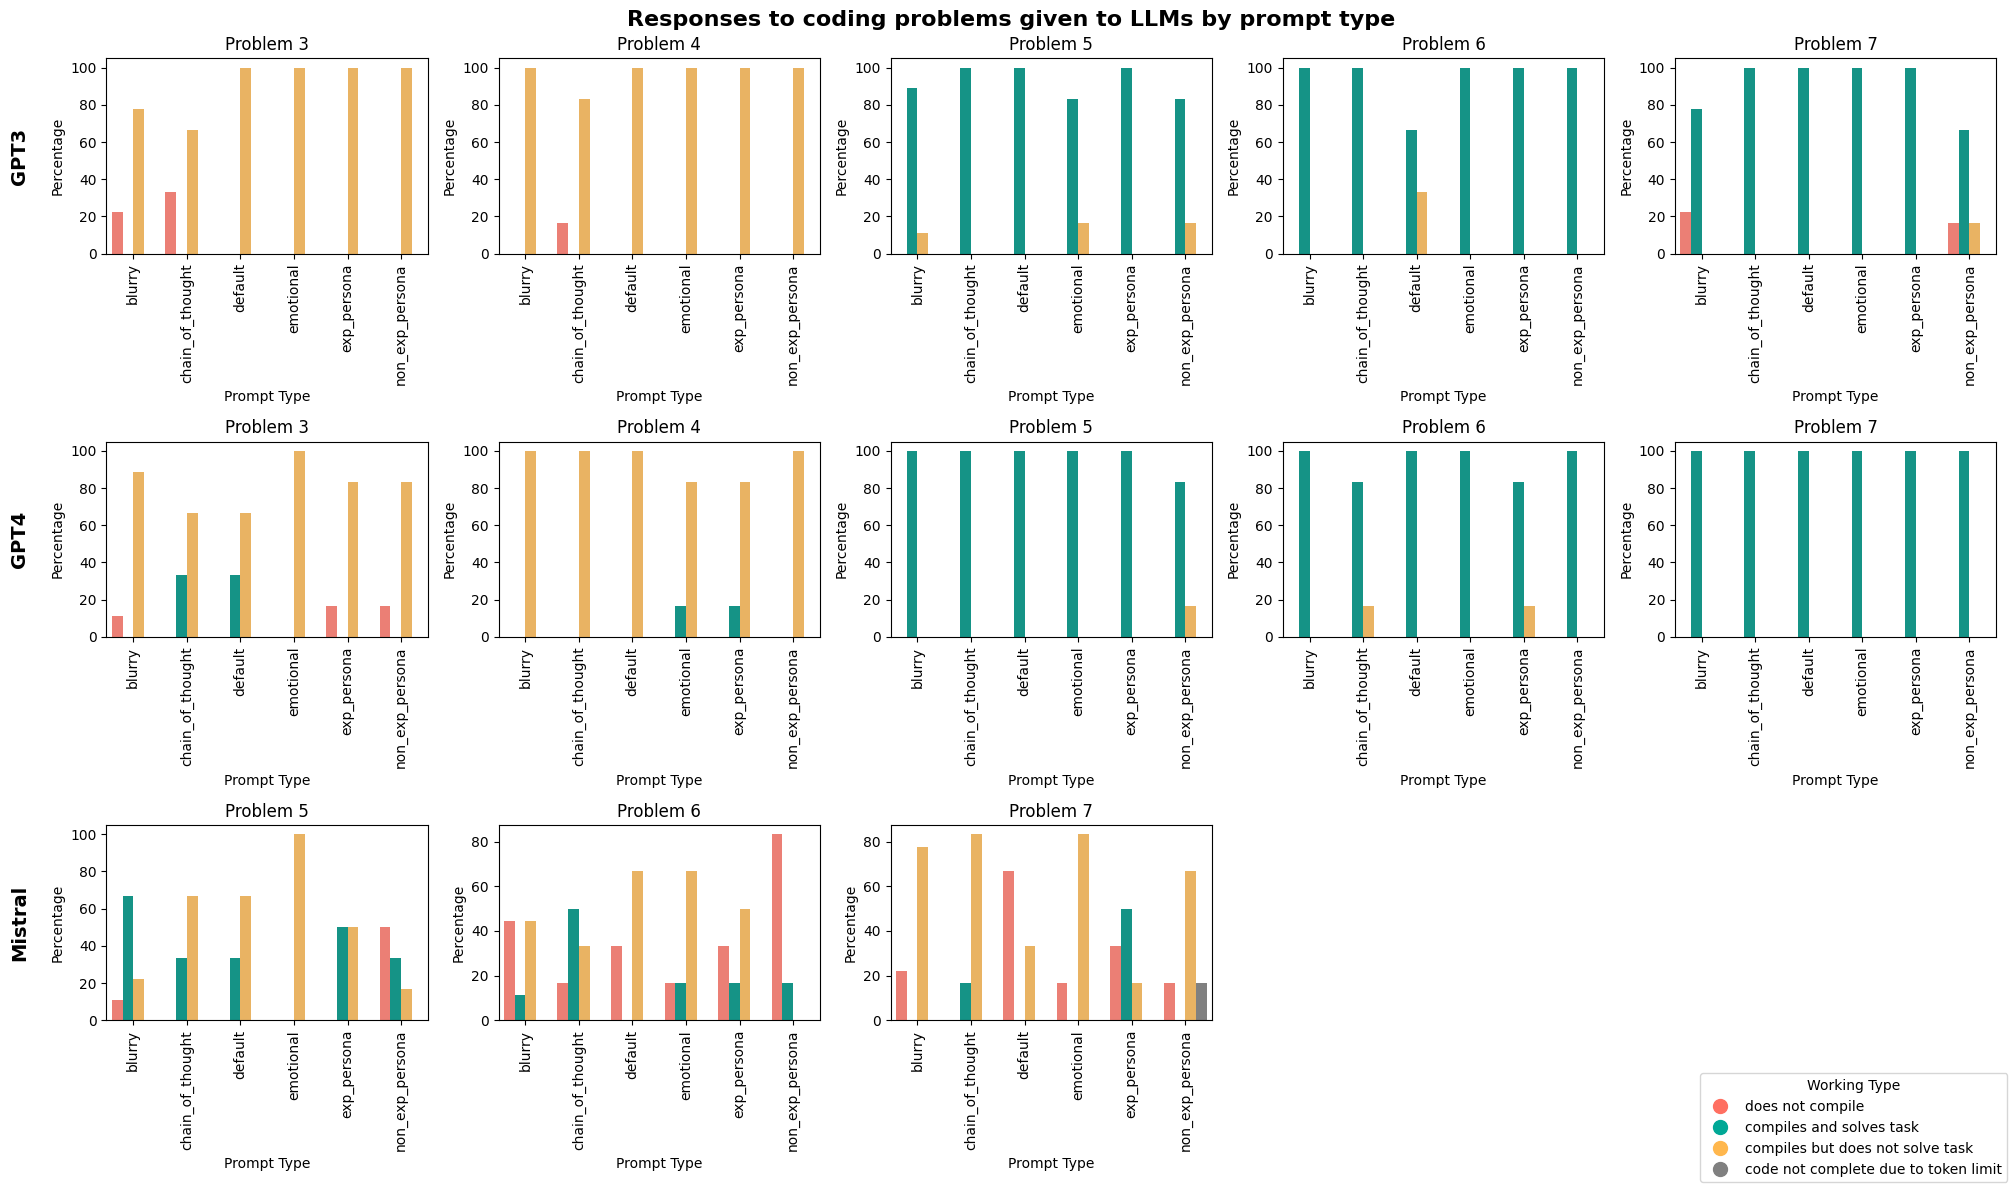

In [103]:
# plotting shares of repsonse type for all models and prompting techniques together for analysis

classification_dict = {
    0: "does not compile",
    1: "compiles and solves task",
    2: "compiles but does not solve task",
    3: "code not complete due to token limit"
}

custom_palette = {
    "does not compile": "#FF6F61",  # red
    "compiles and solves task": "#00A896",  # green
    "compiles but does not solve task": "#FFB74D",  # orange
    "code not complete due to token limit": "grey"
}

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

for i, (p_dataframes, label) in enumerate(zip([p_dataframes_gpt3, p_dataframes_gpt4, p_dataframes_mistral], ['GPT3', 'GPT4', 'Mistral'])):
    for j, df in enumerate(p_dataframes):
        for code, status in classification_dict.items():
            column_name = status
            df[column_name] = (df[['run_1_working', 'run_2_working', 'run_3_working']] == code).sum(axis=1)

        grouped_df = df.groupby('prompt_type')[[f'{status}' for status in classification_dict.values()]].sum()

        total_runs = grouped_df.sum(axis=1)

        percentage_df = grouped_df.div(total_runs, axis=0) * 100

        melted_df = percentage_df.reset_index().melt(id_vars='prompt_type', var_name='working_type', value_name='percentage')

        sns.barplot(data=melted_df, x='prompt_type', y='percentage', hue='working_type', ax=axes[i, j], palette=custom_palette)
        if label == 'Mistral':
            axes[i, j].set_title(f'Problem {j+5}')
        else:
            axes[i, j].set_title(f'Problem {j+3}')
        axes[i, j].set_xlabel('Prompt Type')
        axes[i, j].set_ylabel('Percentage')
        axes[i, j].tick_params(axis='x', rotation=90)

        axes[i, j].get_legend().remove()

for ax in axes[-1, 3:]:
    ax.remove()

for i, label in enumerate(['GPT3', 'GPT4', 'Mistral']):
    axes[i, 0].text(-0.3, 0.5, label, fontsize=14, fontweight='bold', va='center', rotation=90, transform=axes[i, 0].transAxes)

handles = [plt.Line2D([], [], color=color, marker='o', linestyle='', markersize=10, label=label) for label, color in custom_palette.items()]
fig.legend(handles=handles, labels=custom_palette.keys(), title='Working Type', loc='lower right')
fig.suptitle('Responses to coding problems given to LLMs by prompt type', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


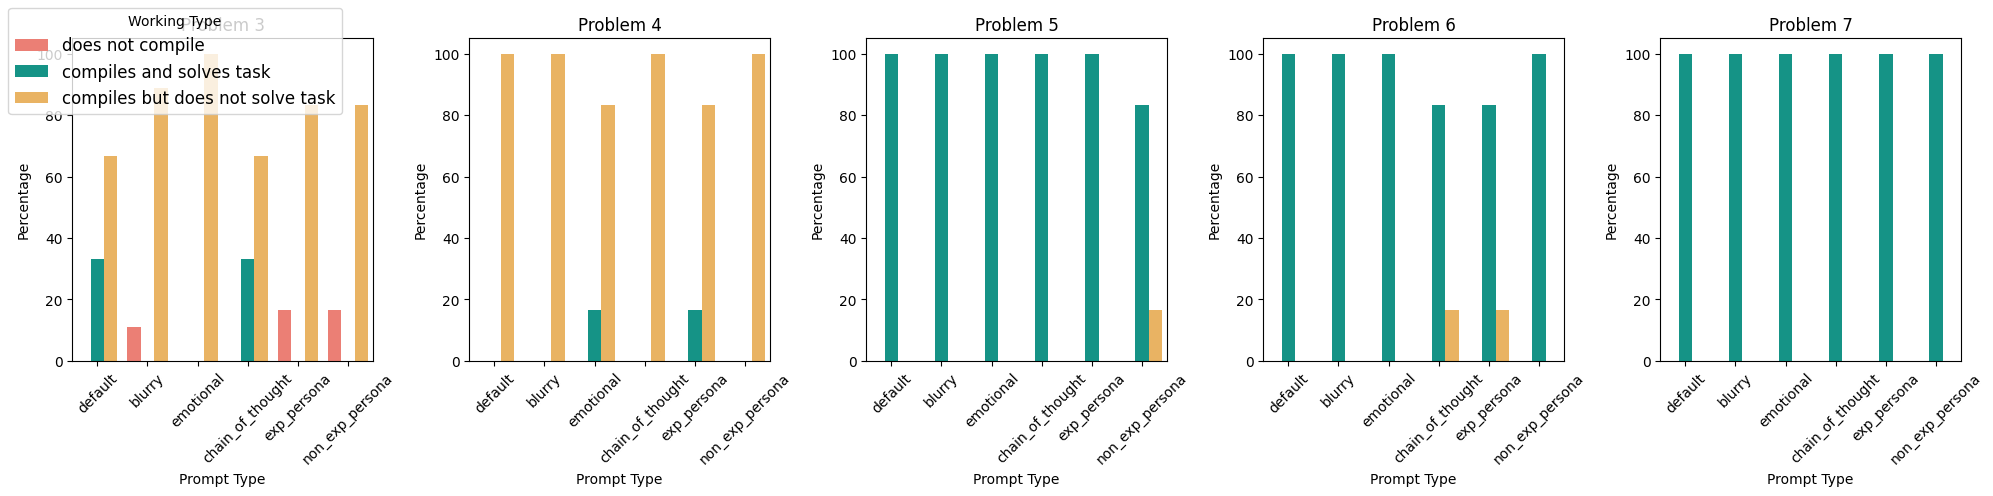

In [61]:
# plotting shares of repsonse type for prompting techniques together for analysis GPT 4


custom_palette = {
    "does not compile": "#FF6F61",  # red
    "compiles and solves task": "#00A896",  # green
    "compiles but does not solve task": "#FFB74D",  # orange
}

order = ['default', 'blurry', 'emotional', 'chain_of_thought', 'exp_persona', 'non_exp_persona']

fig, axes = plt.subplots(nrows=1, ncols=len(p_dataframes_gpt4), figsize=(20, 5))

for i, df in enumerate(p_dataframes_gpt4):
    for code, status in classification_dict.items():
        column_name = status
        df[column_name] = (df[['run_1_working', 'run_2_working', 'run_3_working']] == code).sum(axis=1)
    
    grouped_df = df.groupby('prompt_type')[[f'{status}' for status in classification_dict.values()]].sum()
    total_runs = grouped_df.sum(axis=1)
    percentage_df = grouped_df.div(total_runs, axis=0) * 100
    melted_df = percentage_df.reset_index().melt(id_vars='prompt_type', var_name='working_type', value_name='percentage')
    
    sns.barplot(data=melted_df, x='prompt_type', y='percentage', hue='working_type', ax=axes[i], palette=custom_palette, order=order)
    axes[i].set_title(f'Problem {i+3}')
    axes[i].set_xlabel('Prompt Type')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].get_legend().remove()

if len(axes) > 1:
    axes = axes.flatten()

handles, labels = axes[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper left', title='Working Type', fontsize='large')
plt.tight_layout()
plt.show()


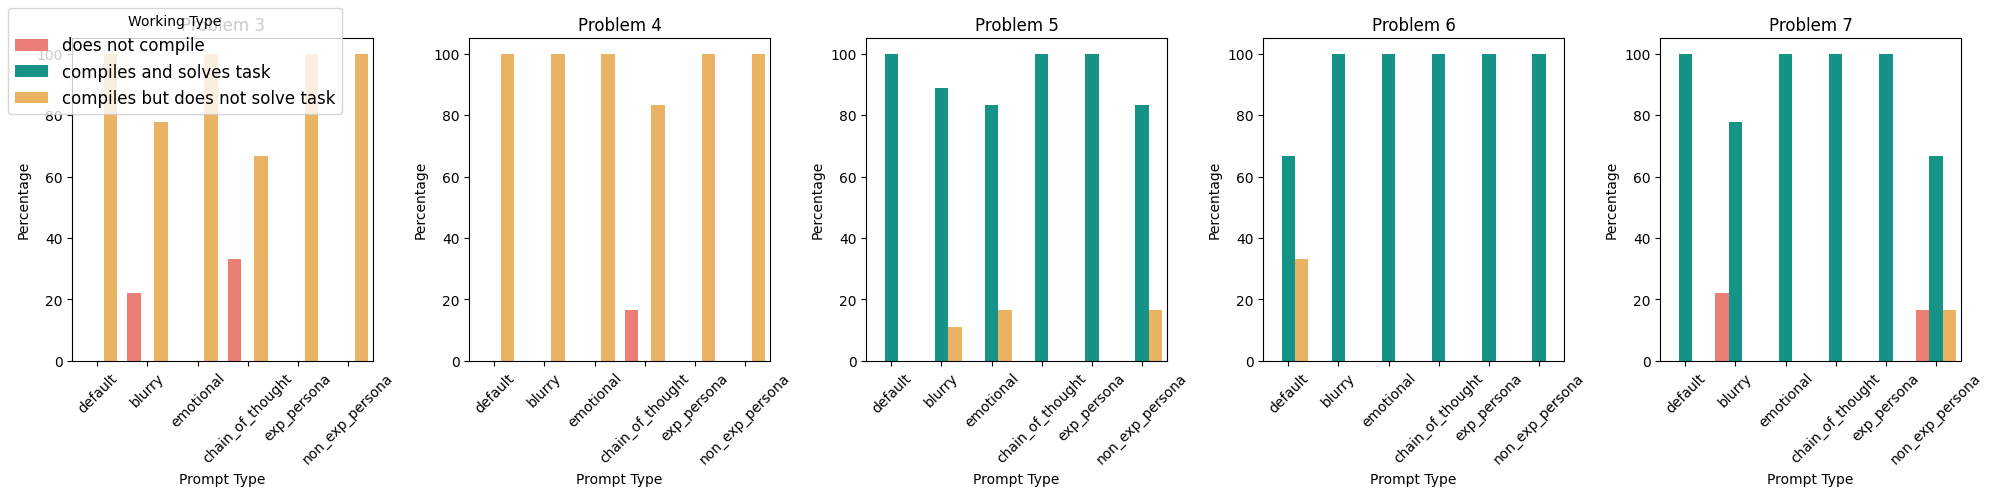

In [60]:
# plotting shares of repsonse type for prompting techniques together for analysis GPT 3.5


order = ['default', 'blurry', 'emotional', 'chain_of_thought', 'exp_persona', 'non_exp_persona']

fig, axes = plt.subplots(nrows=1, ncols=len(p_dataframes_gpt3), figsize=(20, 5))

for i, df in enumerate(p_dataframes_gpt3):
    for code, status in classification_dict.items():
        column_name = status
        df[column_name] = (df[['run_1_working', 'run_2_working', 'run_3_working']] == code).sum(axis=1)
    
    grouped_df = df.groupby('prompt_type')[[f'{status}' for status in classification_dict.values()]].sum()
    total_runs = grouped_df.sum(axis=1)
    percentage_df = grouped_df.div(total_runs, axis=0) * 100
    melted_df = percentage_df.reset_index().melt(id_vars='prompt_type', var_name='working_type', value_name='percentage')
    
    sns.barplot(data=melted_df, x='prompt_type', y='percentage', hue='working_type', ax=axes[i], palette=custom_palette, order=order)
    axes[i].set_title(f'Problem {i+3}')
    axes[i].set_xlabel('Prompt Type')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].get_legend().remove()

if len(axes) > 1:
    axes = axes.flatten()

handles, labels = axes[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper left', title='Working Type', fontsize='large')
plt.tight_layout()
plt.show()


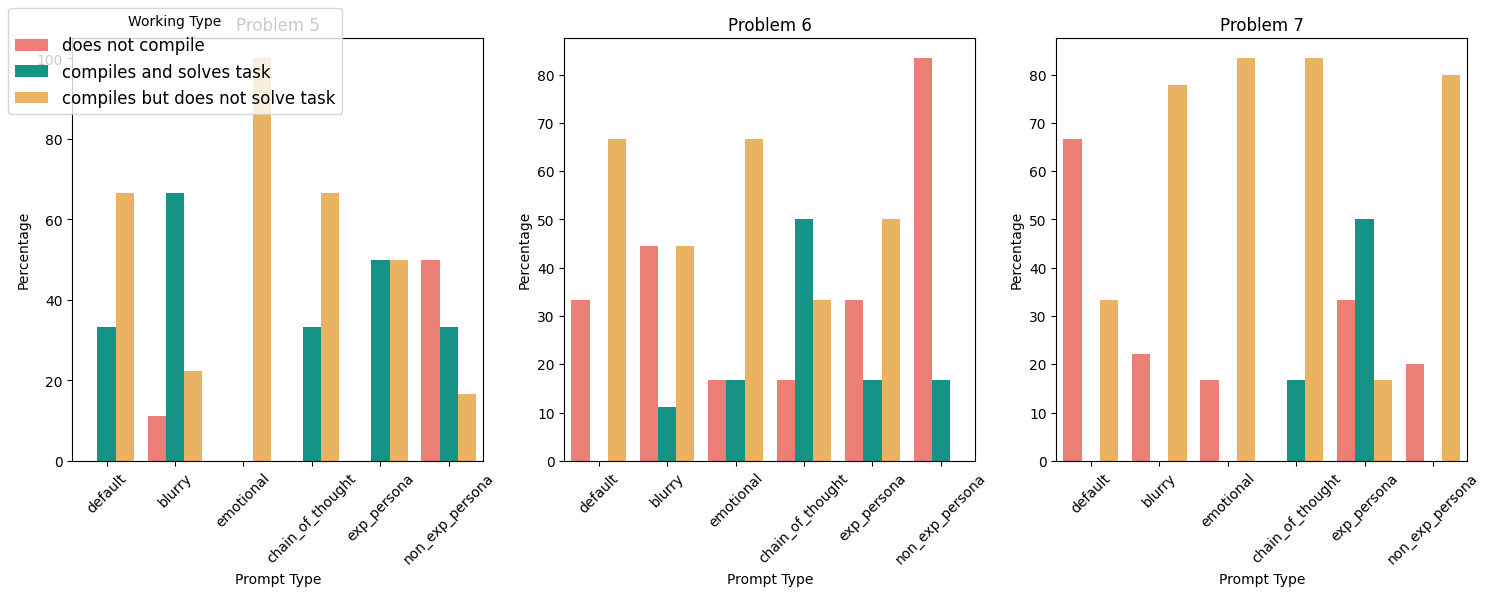

In [63]:
# plotting shares of repsonse type for prompting techniques together for analysis Mistral

order = ['default', 'blurry', 'emotional', 'chain_of_thought', 'exp_persona', 'non_exp_persona']

fig, axes = plt.subplots(nrows=1, ncols=len(p_dataframes_mistral), figsize=(15, 6))

for i, df in enumerate(p_dataframes_mistral):
    for code, status in classification_dict.items():
        column_name = status
        df[column_name] = (df[['run_1_working', 'run_2_working', 'run_3_working']] == code).sum(axis=1)
    
    grouped_df = df.groupby('prompt_type')[[f'{status}' for status in classification_dict.values()]].sum()
    total_runs = grouped_df.sum(axis=1)
    percentage_df = grouped_df.div(total_runs, axis=0) * 100
    melted_df = percentage_df.reset_index().melt(id_vars='prompt_type', var_name='working_type', value_name='percentage')
    
    sns.barplot(data=melted_df, x='prompt_type', y='percentage', hue='working_type', ax=axes[i], palette=custom_palette, order=order)
    axes[i].set_title(f'Problem {i+5}')
    axes[i].set_xlabel('Prompt Type')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].get_legend().remove()

if len(axes) > 1:
    axes = axes.flatten()

handles, labels = axes[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper left', title='Working Type', fontsize='large')
plt.tight_layout()
plt.show()


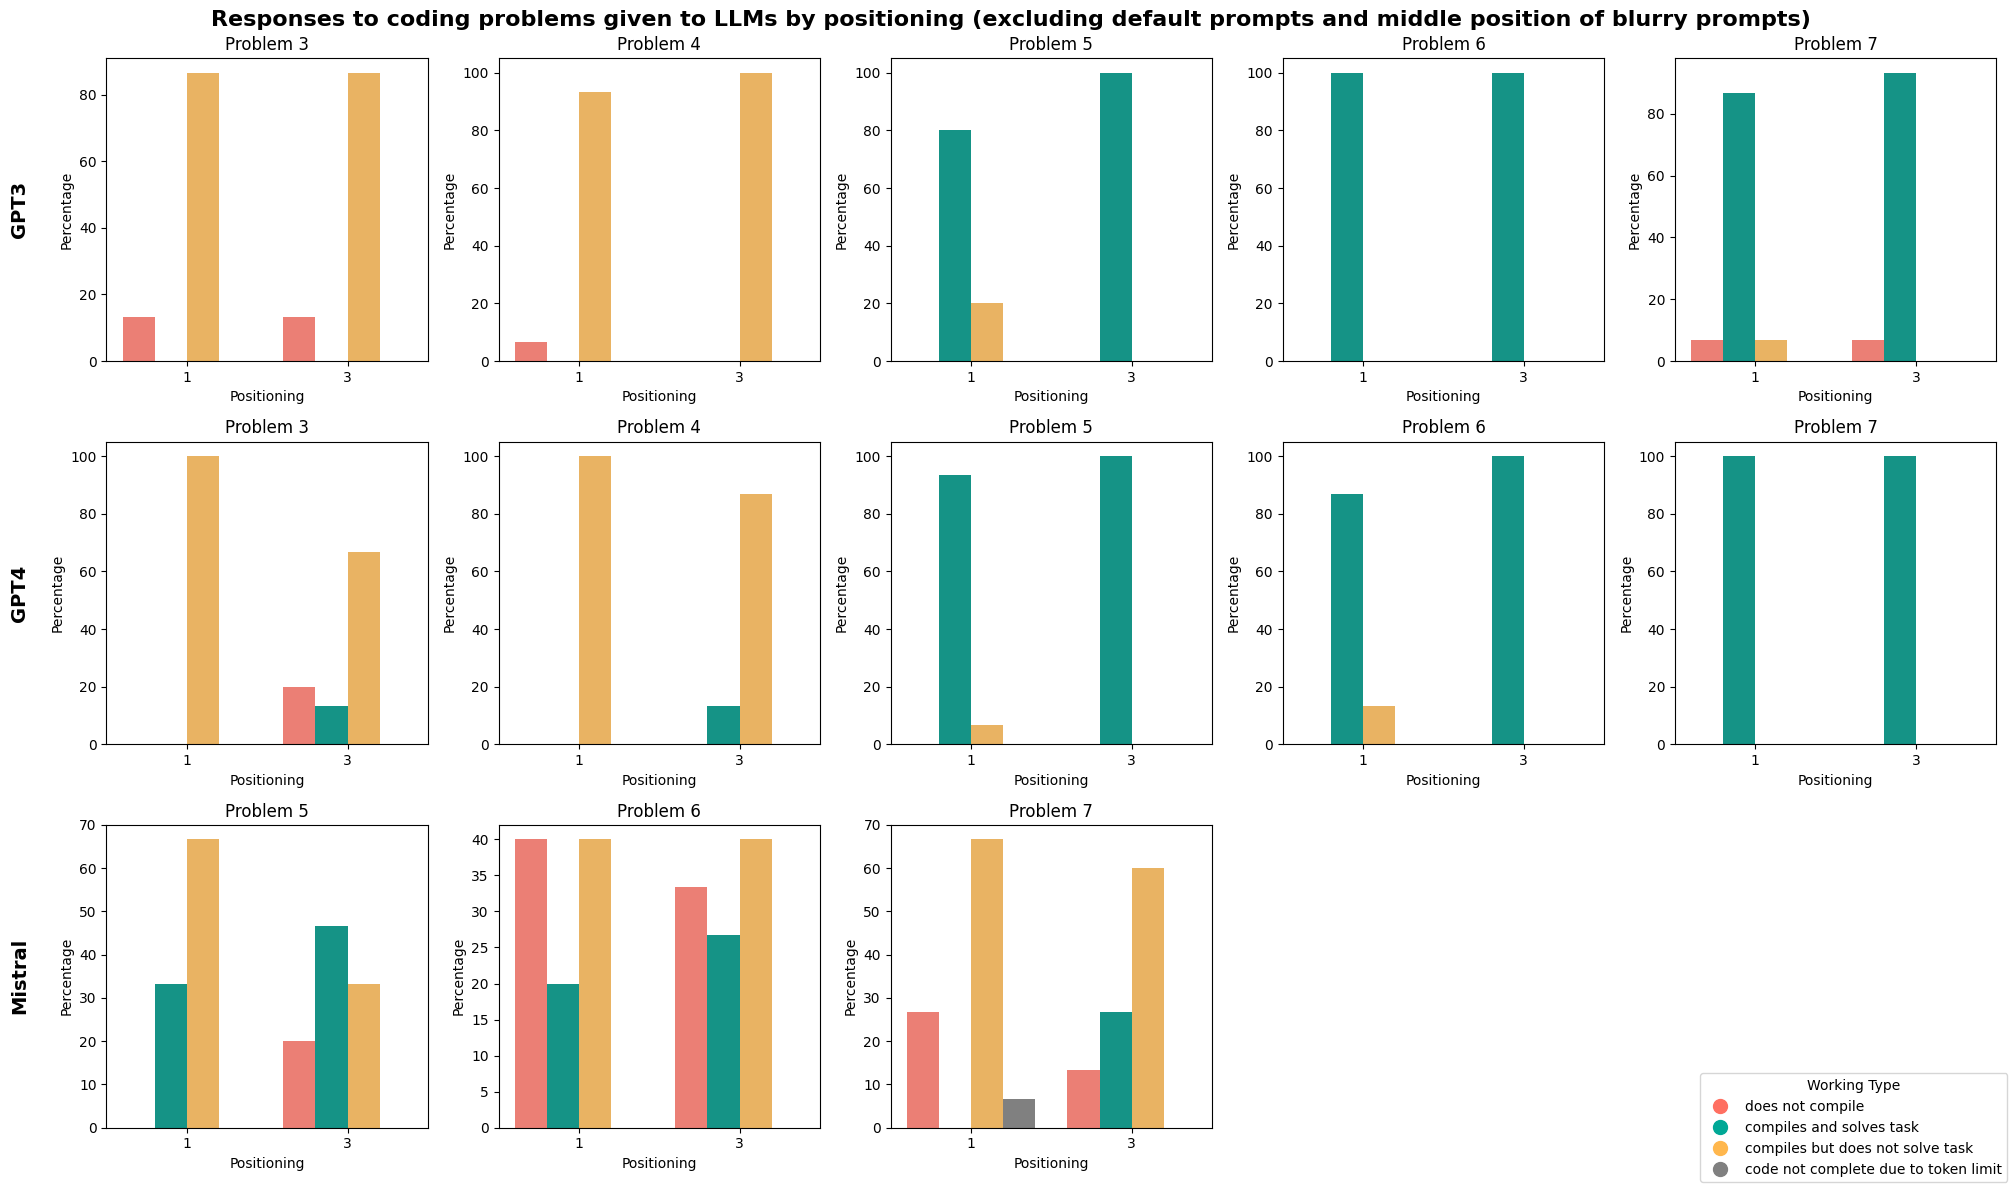

In [106]:
# plotting shares of repsonse type by position  together for all models
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))

for i, (p_dataframes, label) in enumerate(zip([p_dataframes_gpt3, p_dataframes_gpt4, p_dataframes_mistral], ['GPT3', 'GPT4', 'Mistral'])):
    for j, df in enumerate(p_dataframes):
        df_filtered = df[(df['prompt_type'] != 'default') &  (df['positioning'] != 2)].copy()
        for code, status in classification_dict.items():
            column_name = status
            df_filtered.loc[:, column_name] = (df_filtered[[f'run_{positioning}_working' for positioning in [1,2,3]]] == code).sum(axis=1).copy()
        grouped_df = df_filtered.groupby('positioning')[[f'{status}' for status in classification_dict.values()]].sum()
        total_runs = grouped_df.sum(axis=1)
        percentage_df = grouped_df.div(total_runs, axis=0) * 100
        melted_df = percentage_df.reset_index().melt(id_vars='positioning', var_name='working_type', value_name='percentage')
        sns.barplot(data=melted_df, x='positioning', y='percentage', hue='working_type', ax=axes[i, j], palette=custom_palette)
        if label == 'Mistral':
            axes[i, j].set_title(f'Problem {j+5}')
        else:
            axes[i, j].set_title(f'Problem {j+3}')
        axes[i, j].set_xlabel('Positioning')
        axes[i, j].set_ylabel('Percentage')
        axes[i, j].tick_params(axis='x', rotation=0)
        axes[i, j].get_legend().remove()

for ax in axes[-1, 3:]:
    ax.remove()

for i, label in enumerate(['GPT3', 'GPT4', 'Mistral']):
    axes[i, 0].text(-0.3, 0.5, label, fontsize=14, fontweight='bold', va='center', rotation=90, transform=axes[i, 0].transAxes)

handles = [plt.Line2D([], [], color=color, marker='o', linestyle='', markersize=10, label=label) for label, color in custom_palette.items()]
fig.legend(handles=handles, labels=custom_palette.keys(), title='Working Type', loc='lower right')
fig.suptitle('Responses to coding problems given to LLMs by positioning (excluding default prompts and middle position of blurry prompts)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


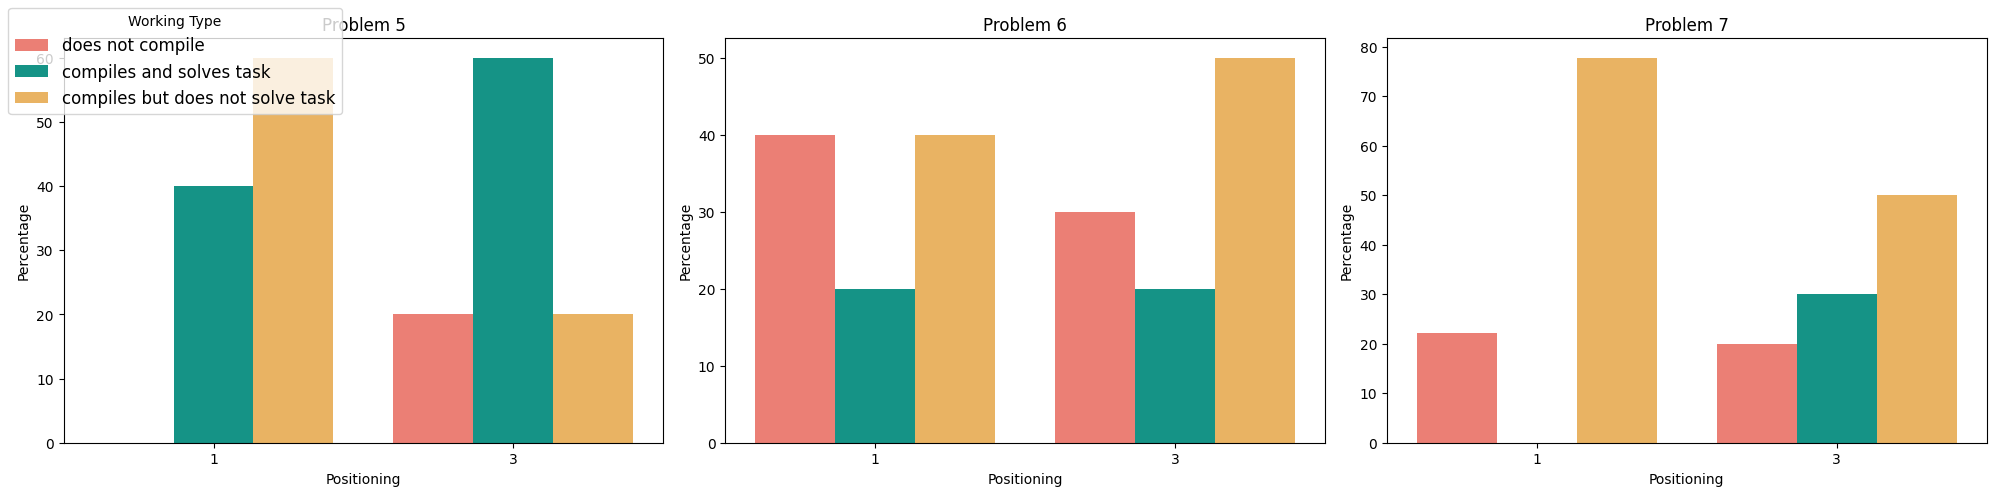

In [78]:
# plotting shares of repsonse type by position  together for Mistral

order = [1, 3]  

fig, axes = plt.subplots(nrows=1, ncols=len(p_dataframes_mistral), figsize=(20, 5))

for i, df in enumerate(p_dataframes_mistral):
    df_filtered = df.loc[(df['prompt_type'] != 'default') & (df['positioning'] != 2)].copy()

    
    for code, status in classification_dict.items():
        column_name = status
        df_filtered[column_name] = (df_filtered[[f'run_{positioning}_working' for positioning in order]] == code).sum(axis=1)
    
    grouped_df = df_filtered.groupby('positioning')[[f'{status}' for status in classification_dict.values()]].sum()
    total_runs = grouped_df.sum(axis=1)
    percentage_df = grouped_df.div(total_runs, axis=0) * 100
    melted_df = percentage_df.reset_index().melt(id_vars='positioning', var_name='working_type', value_name='percentage')
    
    sns.barplot(data=melted_df, x='positioning', y='percentage', hue='working_type', ax=axes[i], palette=custom_palette, order=order)
    axes[i].set_title(f'Problem {i+5}')
    axes[i].set_xlabel('Positioning')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=0)
    
    axes[i].get_legend().remove()

if len(axes) > 1:
    axes = axes.flatten()

handles, labels = axes[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper left', title='Working Type', fontsize='large')
plt.tight_layout()
plt.show()


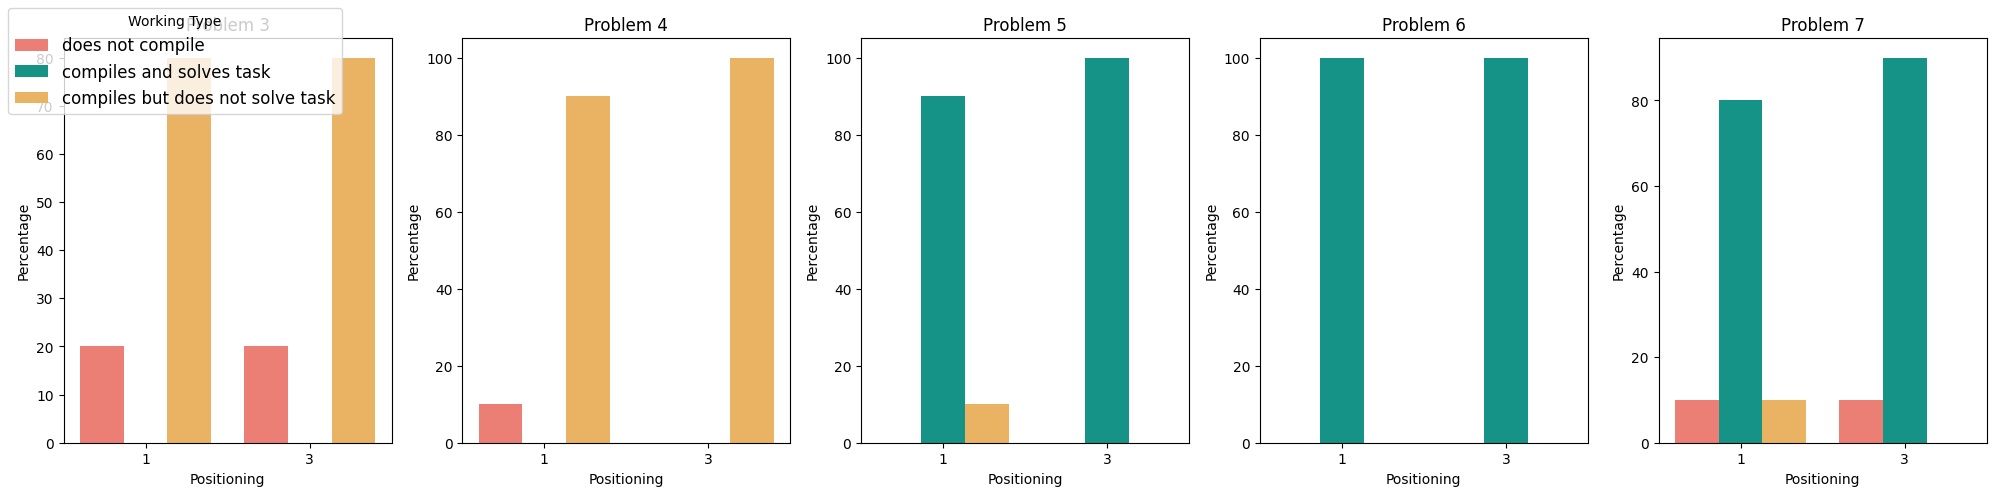

In [79]:
# plotting shares of repsonse type by position  together for GPT 3.5

order = [1, 3]  

fig, axes = plt.subplots(nrows=1, ncols=len(p_dataframes_gpt3), figsize=(20, 5))

for i, df in enumerate(p_dataframes_gpt3):
    df_filtered = df.loc[(df['prompt_type'] != 'default') & (df['positioning'] != 2)].copy()

    
    for code, status in classification_dict.items():
        column_name = status
        df_filtered[column_name] = (df_filtered[[f'run_{positioning}_working' for positioning in order]] == code).sum(axis=1)
    
    grouped_df = df_filtered.groupby('positioning')[[f'{status}' for status in classification_dict.values()]].sum()
    total_runs = grouped_df.sum(axis=1)
    percentage_df = grouped_df.div(total_runs, axis=0) * 100
    melted_df = percentage_df.reset_index().melt(id_vars='positioning', var_name='working_type', value_name='percentage')
    
    sns.barplot(data=melted_df, x='positioning', y='percentage', hue='working_type', ax=axes[i], palette=custom_palette, order=order)
    axes[i].set_title(f'Problem {i+3}')
    axes[i].set_xlabel('Positioning')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=0)
    
    axes[i].get_legend().remove()

if len(axes) > 1:
    axes = axes.flatten()

handles, labels = axes[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper left', title='Working Type', fontsize='large')
plt.tight_layout()
plt.show()


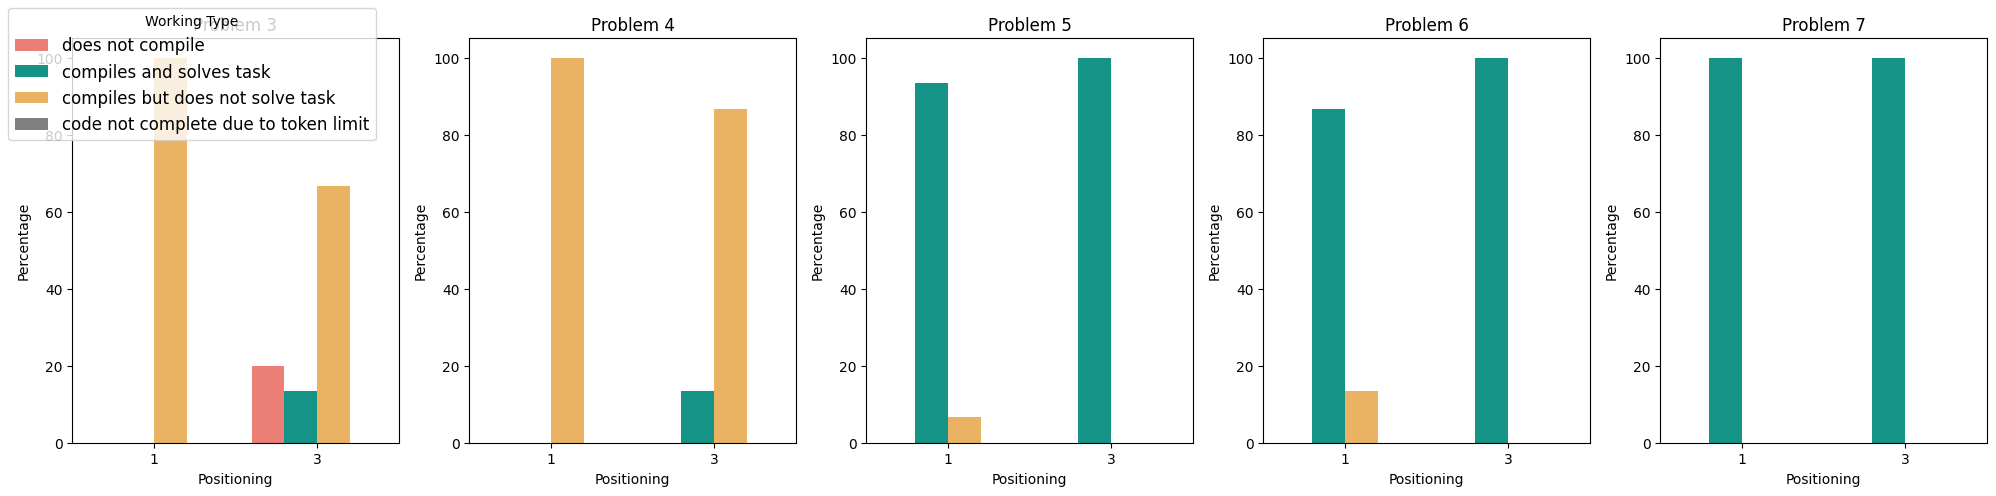

In [105]:
# plotting shares of repsonse type by position  together for GPT 4

order = [1, 3]  
fig, axes = plt.subplots(nrows=1, ncols=len(p_dataframes_gpt4), figsize=(20, 5))

for i, df in enumerate(p_dataframes_gpt4):
    df_filtered = df.loc[(df['prompt_type'] != 'default') & (df['positioning'] != 2)].copy()

    
    for code, status in classification_dict.items():
        column_name = status
        df_filtered[column_name] = (df_filtered[[f'run_{positioning}_working' for positioning in [1,2,3]]] == code).sum(axis=1)
    
    grouped_df = df_filtered.groupby('positioning')[[f'{status}' for status in classification_dict.values()]].sum()
    total_runs = grouped_df.sum(axis=1)
    percentage_df = grouped_df.div(total_runs, axis=0) * 100
    melted_df = percentage_df.reset_index().melt(id_vars='positioning', var_name='working_type', value_name='percentage')
    
    sns.barplot(data=melted_df, x='positioning', y='percentage', hue='working_type', ax=axes[i], palette=custom_palette, order=order)
    axes[i].set_title(f'Problem {i+3}')
    axes[i].set_xlabel('Positioning')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=0)
    
    axes[i].get_legend().remove()

if len(axes) > 1:
    axes = axes.flatten()

handles, labels = axes[-1].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper left', title='Working Type', fontsize='large')
plt.tight_layout()
plt.show()


In [84]:
# code to extract the comments created during the evaluation of results

def process_dataframes(dataframes):
    def separate_comments(comment):
        sentences = []
        errors = []
        insights = []
        error_flag = False
        insight_flag = False

        if isinstance(comment, str):
            parts = comment.split('.')

            for part in parts:
                if 'ERROR' in part:
                    error_flag = True
                    errors.append(part.strip())
                elif 'INSIGHT' in part:
                    insight_flag = True
                    insights.append(part.strip())
                elif error_flag:
                    errors[-1] += '.' + part.strip()
                elif insight_flag:
                    insights[-1] += '.' + part.strip()
                else:
                    sentences.append(part.strip())

        return sentences, errors, insights

    all_comments = []
    all_errors = []
    all_insights = []

    for df in dataframes:
        comments_run = []
        errors_run = []
        insights_run = []

        for index, row in df.iterrows():
            run_comments = []
            run_errors = []
            run_insights = []

            for run in ['run_1', 'run_2', 'run_3']:
                column_name = f'{run}_comments'

                if column_name in df.columns:
                    sentences, errors, insights = separate_comments(row[column_name])

                    run_comments.extend(sentences)

                    run_errors.extend(errors)

                    run_insights.extend(insights)

            comments_run.append(run_comments)
            errors_run.append(run_errors)
            insights_run.append(run_insights)

        all_comments.append(comments_run)
        all_errors.append(errors_run)
        all_insights.append(insights_run)

    for df, comments, errors, insights in zip(dataframes, all_comments, all_errors, all_insights):
        df['all_comments'] = comments
        df['all_errors'] = errors
        df['all_insights'] = insights

    return dataframes



In [85]:
# processing the comments of all lists of datframes for each model

p_dataframes_gpt3_processed = process_dataframes(p_dataframes_gpt3)
p_dataframes_gpt4_processed = process_dataframes(p_dataframes_gpt4)
p_dataframes_mistral_processed = process_dataframes(p_dataframes_mistral)


In [86]:
# counting the amount of times certain comments appear for each prompt type and creating a new list of dataframes

def count_comments_in_dfs(list_of_dataframes):
    def count_items(all_comments_list, unique_items):
        row_counts = {}
        for item in unique_items:
            count = all_comments_list.count(item)
            row_counts[item] = count
        return row_counts
    
    result_dfs = []
    
    for df in list_of_dataframes:
        unique_items = set(item for sublist in df['all_comments'] for item in sublist)
        
        counts_df = pd.DataFrame(columns=['prompt_type', 'positioning'] + [f'run_{i}_working' for i in range(1, 4)] + list(unique_items))
        
        for index, row in df.iterrows():
            row_counts = count_items(row['all_comments'], unique_items)
            
            row_counts['prompt_type'] = row['prompt_type']
            row_counts['positioning'] = row['positioning']
            
            for i in range(1, 4):
                row_counts[f'run_{i}_working'] = row[f'run_{i}_working']
            
            counts_df = pd.concat([counts_df, pd.DataFrame([row_counts])], ignore_index=True)
        
        result_dfs.append(counts_df)
    
    return result_dfs

comment_counts_mistral = count_comments_in_dfs(p_dataframes_mistral_processed)


In [87]:
comment_counts_gpt3 = count_comments_in_dfs(p_dataframes_gpt3_processed)
comment_counts_gpt4 = count_comments_in_dfs(p_dataframes_gpt4_processed)


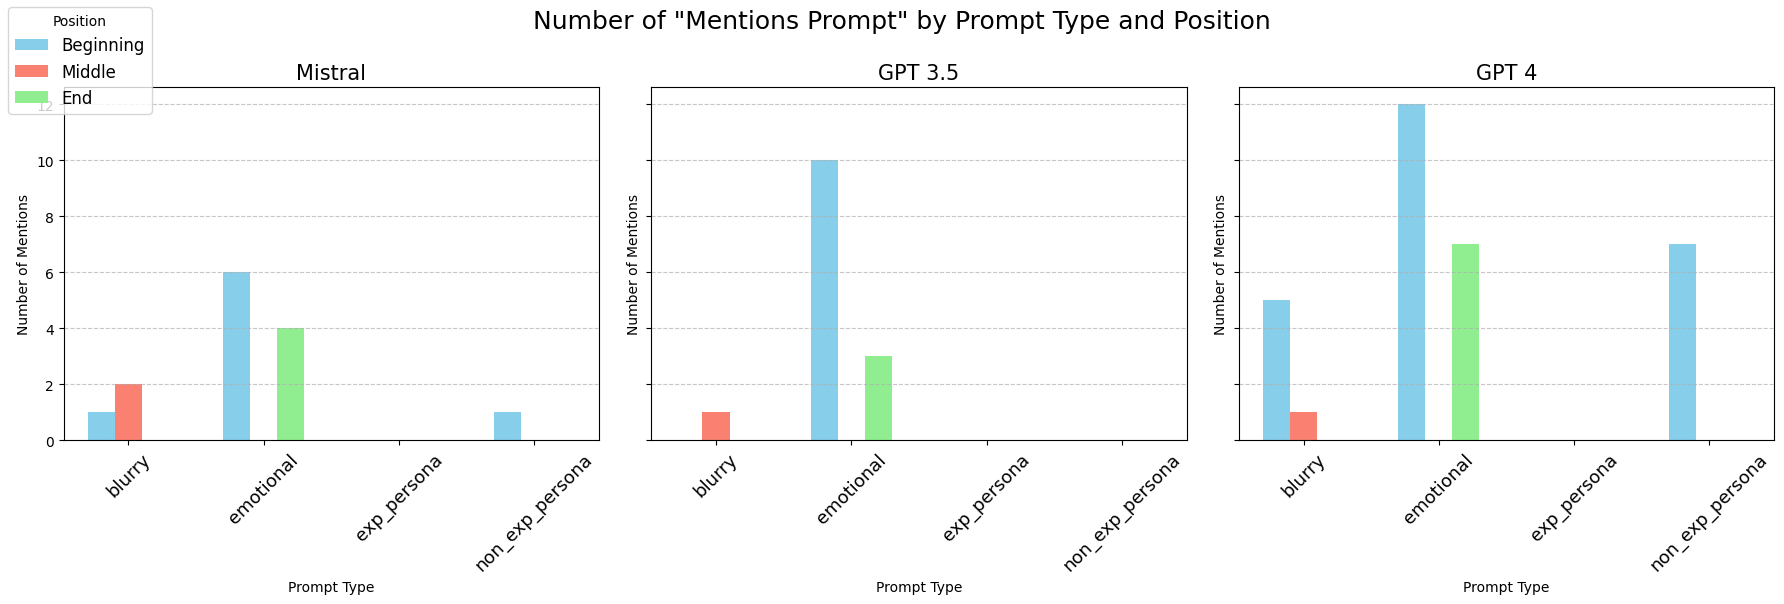

In [100]:
# using the lists of dataframes created above to plot the amount of times a model responded to additional input in a prompt, given the prompt type and position of instructions. 


combined_dfs = [pd.concat(df_list) for df_list in [comment_counts_mistral, comment_counts_gpt3,comment_counts_gpt4 ]]

fig, axs = plt.subplots(ncols=3, figsize=(18, 6), sharey=True)

for i, combined_df in enumerate(combined_dfs):
    filtered_df = combined_df[(combined_df['prompt_type'].isin(['blurry', 'emotional', 'exp_persona', 'non_exp_persona']))]

    mentions_count = filtered_df.groupby(['prompt_type', 'positioning'])['mentions prompt'].sum().unstack(fill_value=0)

    # Plot
    positions = mentions_count.columns.tolist()
    colors = ['skyblue', 'salmon', 'lightgreen']  
    bar_width = 0.2  
    bar_offsets = [-bar_width, 0, bar_width]  

    for j, (position, color) in enumerate(zip(positions, colors)):
        bar_positions = [x + bar_offsets[j] for x in range(len(mentions_count))]
        axs[i].bar(bar_positions, mentions_count[position], width=bar_width, color=color, label=f'Position {position}')

    axs[i].set_title([ 'Mistral', 'GPT 3.5', 'GPT 4'][i], size = 15)
    axs[i].set_ylabel('Number of Mentions')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

    axs[i].set_xticks(range(len(mentions_count)))
    axs[i].set_xticklabels(mentions_count.index, size = 13, rotation = 45)
    axs[i].set_xlabel('Prompt Type')

fig.legend(title='Position', labels=['Beginning', 'Middle', 'End'], loc='upper left', fontsize = 'large')

plt.suptitle('Number of "Mentions Prompt" by Prompt Type and Position', y=1, size = 18)
plt.xlabel('Prompt Type')
plt.tight_layout()
plt.show()
